# Assignment 2: Statistical Learning & Sound Event Classification Fundamentals

CS-GY 9223: Machine Listening

Below you will find a mix of coding questions and writing questions to familiarize you with the fundamentals of signal processing in Python.

**Read through the text, code, and comments carefully and fill-in the blanks accordingly. Written questions will be denoted with❓, and code questions will be explained in code comments, both with "TODO" markers. Code fill-ins will also often have templated "Nones" where you'll fill in that part. It will be specified whether you should write your code from scratch or use a built-in method.**

**For all plots, include axis labels with units of measurement when applicable. Lack of this will result in small points deductions.**

The assignment will be 10 points total (possibility of +2 points extra credit). Each code and text question is labeled with fractional point values.

### ⚠️ Before you begin - Python packages⚠️
For this assignment you will need Pandas (`pip install pandas`), tqdm (`pip install tqdm`), scikit-learn, and librosa in addition to matplotlib and numpy (which you should have from the first assignment). If you don't have all of these already in your environment/Conda environment, open your terminal, activate your Conda environment, and `pip install <package>` from there *before* launching `jupyter notebook` from within that environment. Then, when you launch the notebook and go to select your kernel, that environment will now have those packages installed

# Part 1: Warming up machine learning fundamentals [2 pts]

In this section you will use a simple dataset to explore data splitting, pre-processing and machine learning model selection. 

In [53]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import librosa
from tqdm import tqdm
import os
import IPython 
import seaborn as sns

### 1.1 Loading data and basic manipulations 🐧 [0.5 pts]
Download the awesome **penguins** dataset from this link: https://github.com/mwaskom/seaborn-data/blob/71e2436a092d714350de0fc409ca8a8714e7e78f/penguins.csv as a CSV file.

The dataset consists of 7 columns:

* `species`: penguin species (Chinstrap, Adélie, or Gentoo)
* `island`: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* `bill_length_mm`: bill length (mm)
* `bill_depth_mm`: bill depth (mm)
* `flipper_length_mm`: flipper length (mm)
* `body_mass_g`: flipper length (mm)
* `sex`: penguin sex





In [11]:
# TODO : Load the dataset into a Pandas DataFrame [0.1 pt]
# TODO : Print the first 5 rows of the dataset using df.head()
df = pd.read_csv('penguins.csv')
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [12]:
# TODO : Filter out rows that have any NaN values. [0.05 pt]
# TODO : Print the number of samples in the dataset before and after filtering.

print(f"Initial number of rows: {len(df)}")
df = df.dropna()
print(f"Final number of rows: {len(df)}")

Initial number of rows: 344
Final number of rows: 333


In [13]:
# TODO : Print the number of samples per species [0.05 pt]
species_counts = df['species'].value_counts()
species_counts

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [14]:
# TODO : Create a DataFrame of the mean flipper length by species and sex within each species and display it [0.1 pt]
df_mean = df.groupby(['species', 'sex'])['flipper_length_mm'].mean()
df_mean

species    sex   
Adelie     FEMALE    187.794521
           MALE      192.410959
Chinstrap  FEMALE    191.735294
           MALE      199.911765
Gentoo     FEMALE    212.706897
           MALE      221.540984
Name: flipper_length_mm, dtype: float64

In [15]:
# TODO : Add a column to the original DataFrame that maps the 3 species types to the labels [0,1,2] [0.1 pt]
# Name this column "species_label"
species_mapping = {
   'Adelie': 0,
   'Chinstrap': 1,
   'Gentoo': 2
}
df['species_label'] = df['species'].map(species_mapping)

# TODO : Print the first 5 rows of the updated DataFrame
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  species_label  
0       3750.0    MALE              0  
1       3800.0  FEMALE              0  
2       3250.0  FEMALE              0  
4       3450.0  FEMALE              0  
5       3650.0    MALE              0

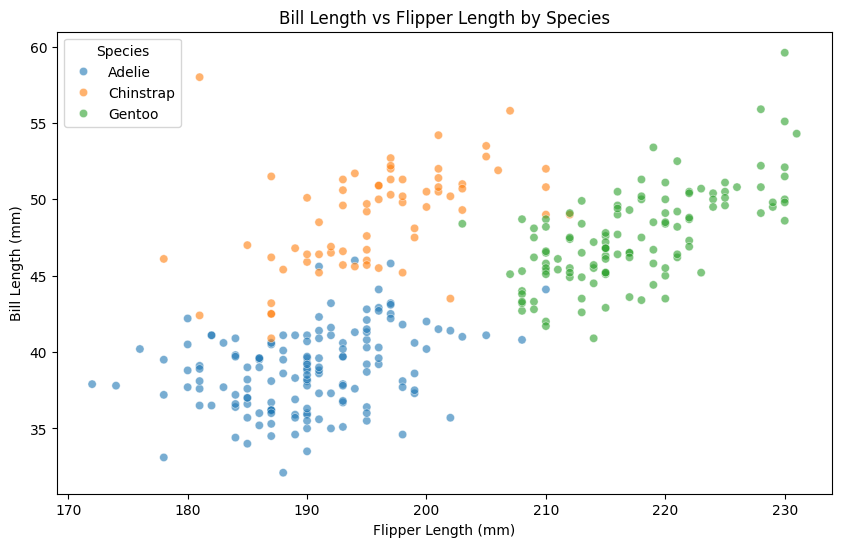

In [16]:
# TODO : Exploratory data plot using matplotlib or seaborn [0.1 pt]
# Plot a scatter plot with flipper length on the x-axis, bill-length on the y-axis, colored by species
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
               x='flipper_length_mm', 
               y='bill_length_mm',
               hue='species',
               alpha=0.6)

# Customize the plot
plt.title('Bill Length vs Flipper Length by Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Length (mm)')

# Add legend
plt.legend(title='Species')

# Show plot
plt.show()

### 1.2 Data preprocessing and splitting [0.5 pts]
You will use flipper length and bill length as your continuous features, and species as your target (but use `species_label`) for training your model. First you will split the data into a training and testing set. After splitting the data, we need to normalize or standardize the data in some way because the scale of data across features differs, use **min-max normalization**, defined as $x' = \frac{x - min(x)}{max(x) - min(x)}$. Write min-max normalization by hand here, ⚠️**do not use a built-in function**⚠️.

Calculate the minimum and maximum value *per feature* across the training dataset, and then apply this formula to every sample, using those min/max values. **You will also use these normalization values in validation and test!**



In [17]:
# TODO : Assign your feature data , which should be a numpy array size (333,2) to `X` [0 pt]
# TODO : Assign your target data to `y`, which should be a numpy array shape (333,)
X = df[['flipper_length_mm', 'bill_length_mm']].values
y = df['species_label'].values


# TODO : Split your data into training and test sets using scikit-learn's train_test_split [0.1 pt]
# We will use cross validation to internally split the training set into train-val.
# Use 80% of your data for train, 20% for test
# Hint: pass `stratify=y` to make sure your splits are balanced in terms of species class
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    stratify=y
)

# TODO : Use the training data statistics to min-max normalize each feature [0.4 pts]
# First calculate the statistics per feature on the training set
# Important! Normalize the test features by the statistics from the training set
min_flipper = np.min(X_train[:, 0])
min_bill = np.min(X_train[:, 1])   
max_flipper = np.max(X_train[:, 0])
max_bill = np.max(X_train[:, 1]) 


# TODO : Use these stats to normalize the features         
flipper_norm_train = (X_train[:, 0] - min_flipper) / (max_flipper - min_flipper)
bill_norm_train = (X_train[:, 1] - min_bill) / (max_bill - min_bill)

flipper_norm_test = (X_test[:, 0] - min_flipper) / (max_flipper - min_flipper)
bill_norm_test = (X_test[:, 1] - min_bill) / (max_bill - min_bill)

# and bring them back together
X_train_norm = np.column_stack((flipper_norm_train, bill_norm_train))
X_test_norm = np.column_stack((flipper_norm_test, bill_norm_test))

# TODO : Print the shape of your train and test features and targets
print("Training features shape:", X_train_norm.shape)
print("Training targets shape:", y_train.shape)
print("Test features shape:", X_test_norm.shape)
print("Test targets shape:", y_test.shape)

Training features shape: (266, 2)
Training targets shape: (266,)
Test features shape: (67, 2)
Test targets shape: (67,)


In [18]:
# TODO : Print the number of samples per class in each of the data splits [0 pt]
# Ensure that classes are proportionately balanced across splits
print("\nTraining set class distribution:")
print(np.bincount(y_train))
print("Training set percentages:")
print(np.bincount(y_train) / len(y_train) * 100)

# Print test set class distribution
print("\nTest set class distribution:")
print(np.bincount(y_test))
print("Test set percentages:")
print(np.bincount(y_test) / len(y_test) * 100)


Training set class distribution:
[117  54  95]
Training set percentages:
[43.98496241 20.30075188 35.71428571]

Test set class distribution:
[29 14 24]
Test set percentages:
[43.28358209 20.89552239 35.82089552]


### 1.3 Basic model training and hyperparameter tuning [1 pt]
Now you'll be training a model to predict species given your features. 
You'll be using **[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)**.
You can use the `scikit-learn` implementation of this model! The documentation provides helpful info on the parameters that you'll need to tweak for the experiments below.

We will be exploring the use of regularization weighting (lambda) **hyperparameter** as discussed in class. 
To select the best parameter for lambda, use **cross-validation** and get the accuracy score for each version of the model. Once you've found the best value for lambda, train one final model using those parameters and evaluate on the test set. 

For this exercise, you can write your own cross-validation and accuracy implementations, or use built-in functions from `scikit-learn`.

In [19]:
# TODO : Train a logistic regression model to predict penguin species (using scikit-learn!) [0.75 pts]
# TODO : Use 5-fold cross validation to find the best weight of regularization (lambda) in terms of mean accuracy
# Use penalty = 'l2'
# Print the accuracy of each model

lambdas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty = 'l2'

# Train your models here 

# Dictionary to store results
results = {}

for lambda_val in lambdas:
    model = LogisticRegression(
        C=1/lambda_val, 
        penalty=penalty,
        max_iter=1000
    )
    
    scores = cross_val_score(
        model, 
        X_train_norm, 
        y_train, 
        cv=5,
        scoring='accuracy'
    )
    
    results[lambda_val] = scores
    print(f"\nLambda = {lambda_val}")
    print(f"Individual fold accuracies: {scores}")
    print(f"Mean accuracy: {scores.mean():.4f}")

best_lambda = max(results.items(), key=lambda x: x[1].mean())[0]
print(f"\nBest lambda: {best_lambda}")
print(f"Best mean accuracy: {results[best_lambda].mean():.4f}")


Lambda = 0.001
Individual fold accuracies: [1.         0.96226415 0.98113208 0.90566038 1.        ]
Mean accuracy: 0.9698

Lambda = 0.01
Individual fold accuracies: [1.         0.96226415 0.98113208 0.90566038 1.        ]
Mean accuracy: 0.9698

Lambda = 0.1
Individual fold accuracies: [1.         0.96226415 0.98113208 0.90566038 1.        ]
Mean accuracy: 0.9698

Lambda = 1
Individual fold accuracies: [0.90740741 0.94339623 0.96226415 0.86792453 0.96226415]
Mean accuracy: 0.9287

Lambda = 10
Individual fold accuracies: [0.81481481 0.79245283 0.77358491 0.77358491 0.79245283]
Mean accuracy: 0.7894

Lambda = 100
Individual fold accuracies: [0.5        0.52830189 0.47169811 0.49056604 0.49056604]
Mean accuracy: 0.4962

Lambda = 1000
Individual fold accuracies: [0.44444444 0.45283019 0.43396226 0.43396226 0.43396226]
Mean accuracy: 0.4398

Best lambda: 0.001
Best mean accuracy: 0.9698


In [20]:
# TODO : use your best-performing parameter of lambda to train a final model and evaluate on the normalized test set [0.25 pts]
# Print your test accuracy
# Create final model with best lambda
final_model = LogisticRegression(
   C=1/best_lambda,
   penalty=penalty,
   max_iter=1000
)

final_model.fit(X_train_norm, y_train)

# Evaluate on test set
test_accuracy = final_model.score(X_test_norm, y_test)
print(f"Final model test accuracy: {test_accuracy:.4f}")

Final model test accuracy: 0.8955


# Part 2: Sound Event Classification with ESC-50 [8 pts]

Now that you've got a standard machine learning framework under your belt, let's do what you came here for: working with audio and designing *machine listening* systems!

You'll be working with a popular environmental sound classification dataset: **[ESC-50](https://github.com/karolpiczak/ESC-50)** for these experiments. We will walk through loading the data and get you more familiar with audio feature extraction and simple model training on real audio data, but with the same principles we used in Part 1.

A few notes about the ESC-50 data:
- 2000 x 5-second long audio recordings in .wav format, in the `audio/*.wav` folder
- original audio has 44.1 kHz sample rate, mono
- metadata can be found in `meta/esc50.csv`
    - `target` is the target class index, while `category` is the name of that class
    - `fold` contains predefined cross-validation folds. For our purposes, we'll use folds 1-3 for training, 4 for val, and 5 for test
    - you can ignore the `esc10` and `take` columns for this assignment


Begin by **downloading the data** [here](https://github.com/karolpiczak/ESC-50?tab=readme-ov-file#download) (~600mb). For more details on the structure of the data and metadata, see [the repository readme](https://github.com/karolpiczak/ESC-50).


### 2.1 Loading data and preliminary analysis [1 pt code + 0.4pts written = 1.4 pts]
First, we will take a look at the metadata and do some preliminary feature extraction to better-understand the features we'll use to train our sound event classifier in the next step.

In [21]:
# TODO : Load the metadata file into a Pandas dataframe and print the first 5 rows [0.05 pts]
data_path = 'ESC-50-master' # define your path to ESC-50 directory
meta_df = meta_df = pd.read_csv(f'{data_path}/meta/esc50.csv')
meta_df.head()

filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A

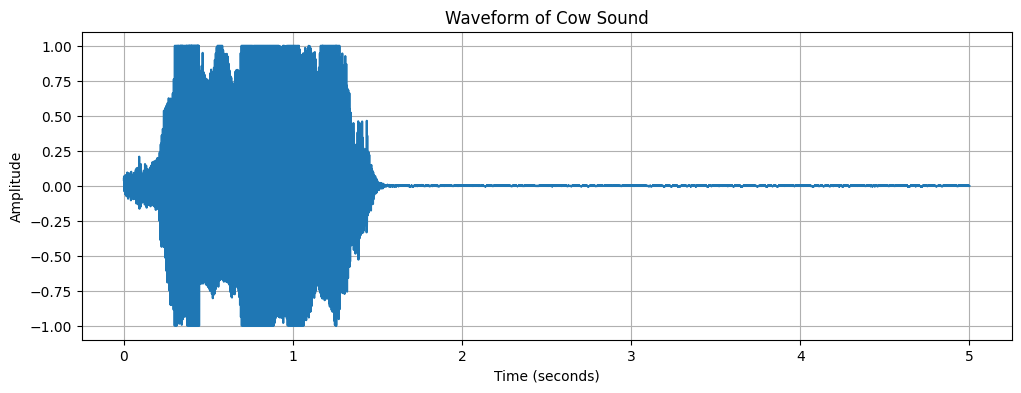

Number of samples: 220500
Sample rate: 44100 Hz
Duration: 5.00 seconds


In [22]:
# TODO : Load an audio file from the `cow` class using Librosa. Use the native sample rate. [0.05 pts]
cow_file = meta_df[meta_df['category'] == 'cow'].iloc[0]['filename']
audio_path = f'{data_path}/audio/{cow_file}'
y, sr = librosa.load(audio_path, sr=None)

# TODO : Plot the waveform 
plt.figure(figsize=(12, 4))
time = np.arange(len(y)) / sr  
plt.plot(time, y)
plt.title('Waveform of Cow Sound')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# TODO : Print the number of audio samples and the sample rate (bonus: plotting x-axis labels with time and not samples :) )
print(f"Number of samples: {len(y)}")
print(f"Sample rate: {sr} Hz")
print(f"Duration: {len(y)/sr:.2f} seconds")

# TODO : Play the sample audio above 
IPython.display.Audio(y, rate=sr)

#### Spectrogram Exploration [0.9 pts]

TODO : Make a plot with 3 subplots: 
1. linear-frequency power spectrogram
2. log-frequency spectrogram
3. log-mel frequency spectrogram

Use `librosa` for computing features. You can use vanilla matplotlib `imshow` for plotting, or `librosa.display.specshow`. A few points to clarify: the `y_axis` parameter in `librosa.display.specshow` does **not** actually change the spectrogram data itself (e.g. if you pass "log", this is purely for visualization purposes). In fact, I recommend plotting your linear and log spectrograms both with log y-axis labeling for better comparison, so that you can really see the difference in your features - not just as an artifact of visualization. You can also pass `y_axis=mel` to `librosa.display.specshow` for the mel spectrogram plots.


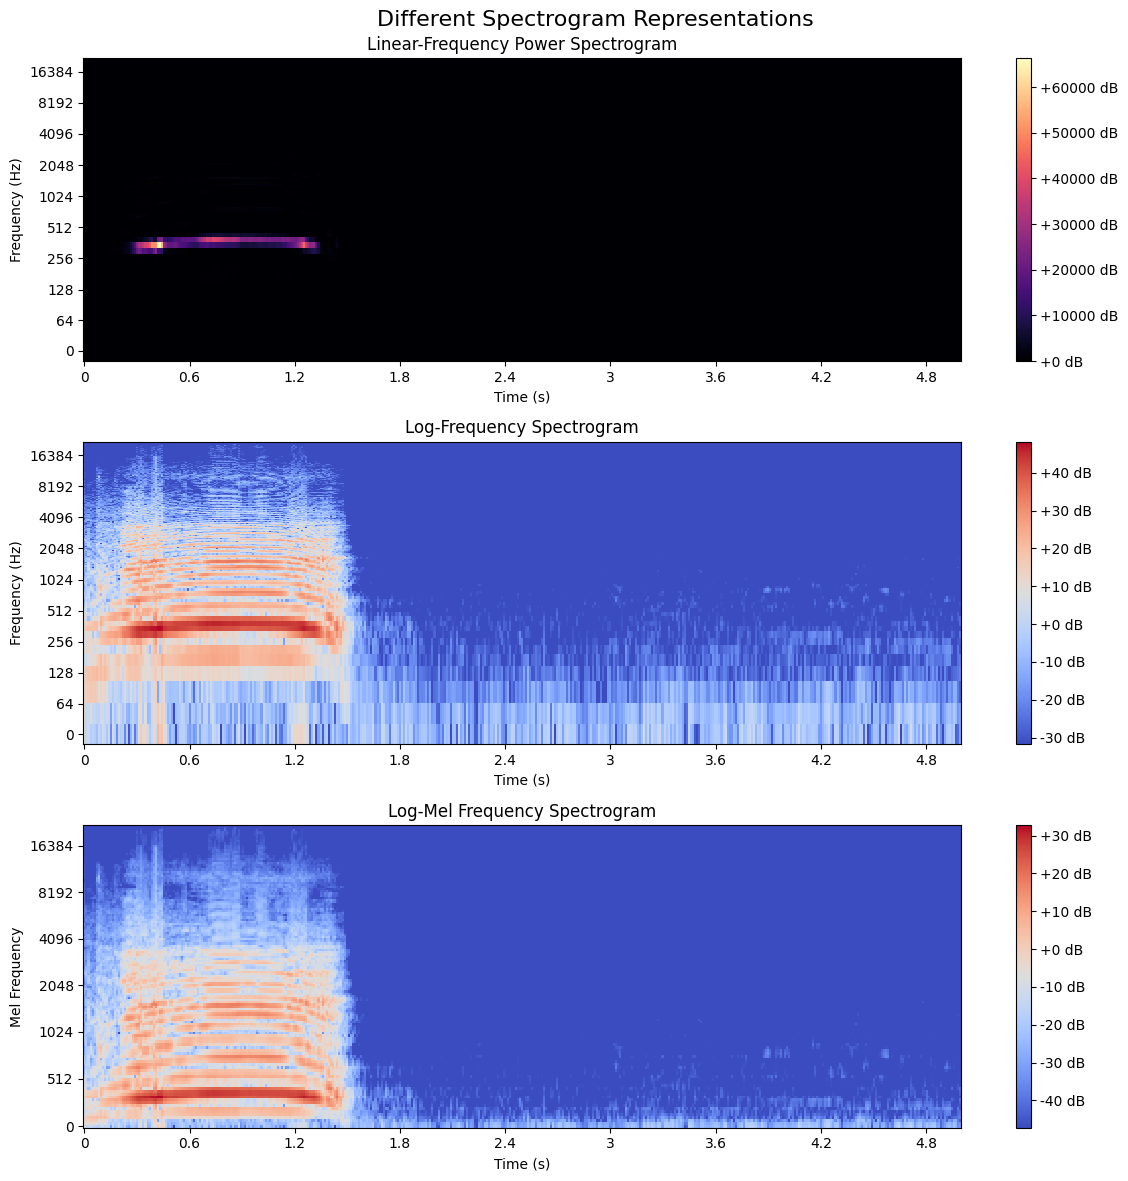

In [23]:
# TODO : Follow the instructions above to explore 3 types of spectrograms on your sample audio via plots [0.9 pts, 0.3 pts per feature/plot]
# Here are some initial window/hop sizes and n_mels, but in the next question you'll explore different options
win_length = 1024
hop_length = 1024//2
n_mels = 128

D = librosa.stft(y, n_fft=win_length, hop_length=hop_length, win_length=win_length)

# TODO : define your spectrograms here
lin_power_spec = np.abs(D) ** 2
log_spec = librosa.amplitude_to_db(np.abs(D))
mel_spec = librosa.feature.melspectrogram(
   y=y, 
   sr=sr,
   n_fft=win_length,
   hop_length=hop_length,
   n_mels=n_mels
)
log_mel_spec = librosa.power_to_db(mel_spec)

# TODO : define your plots here
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
fig.suptitle('Different Spectrogram Representations', fontsize=16)

# 1. Linear-frequency power spectrogram
img1 = librosa.display.specshow(
    lin_power_spec, 
    sr=sr,
    hop_length=hop_length,
    y_axis='log', 
    x_axis='time',
    ax=axes[0]
)
axes[0].set_title('Linear-Frequency Power Spectrogram')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Frequency (Hz)')
fig.colorbar(img1, ax=axes[0], format='%+2.0f dB')

# 2. Log-frequency spectrogram
img2 = librosa.display.specshow(
    log_spec,
    sr=sr,
    hop_length=hop_length,
    y_axis='log',
    x_axis='time',
    ax=axes[1]
)
axes[1].set_title('Log-Frequency Spectrogram')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Frequency (Hz)')
fig.colorbar(img2, ax=axes[1], format='%+2.0f dB')

# 3. Log-mel spectrogram
img3 = librosa.display.specshow(
    log_mel_spec,
    sr=sr,
    hop_length=hop_length,
    y_axis='mel',
    x_axis='time',
    ax=axes[2]
)
axes[2].set_title('Log-Mel Frequency Spectrogram')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Mel Frequency')
fig.colorbar(img3, ax=axes[2], format='%+2.0f dB')

plt.tight_layout()
plt.show()

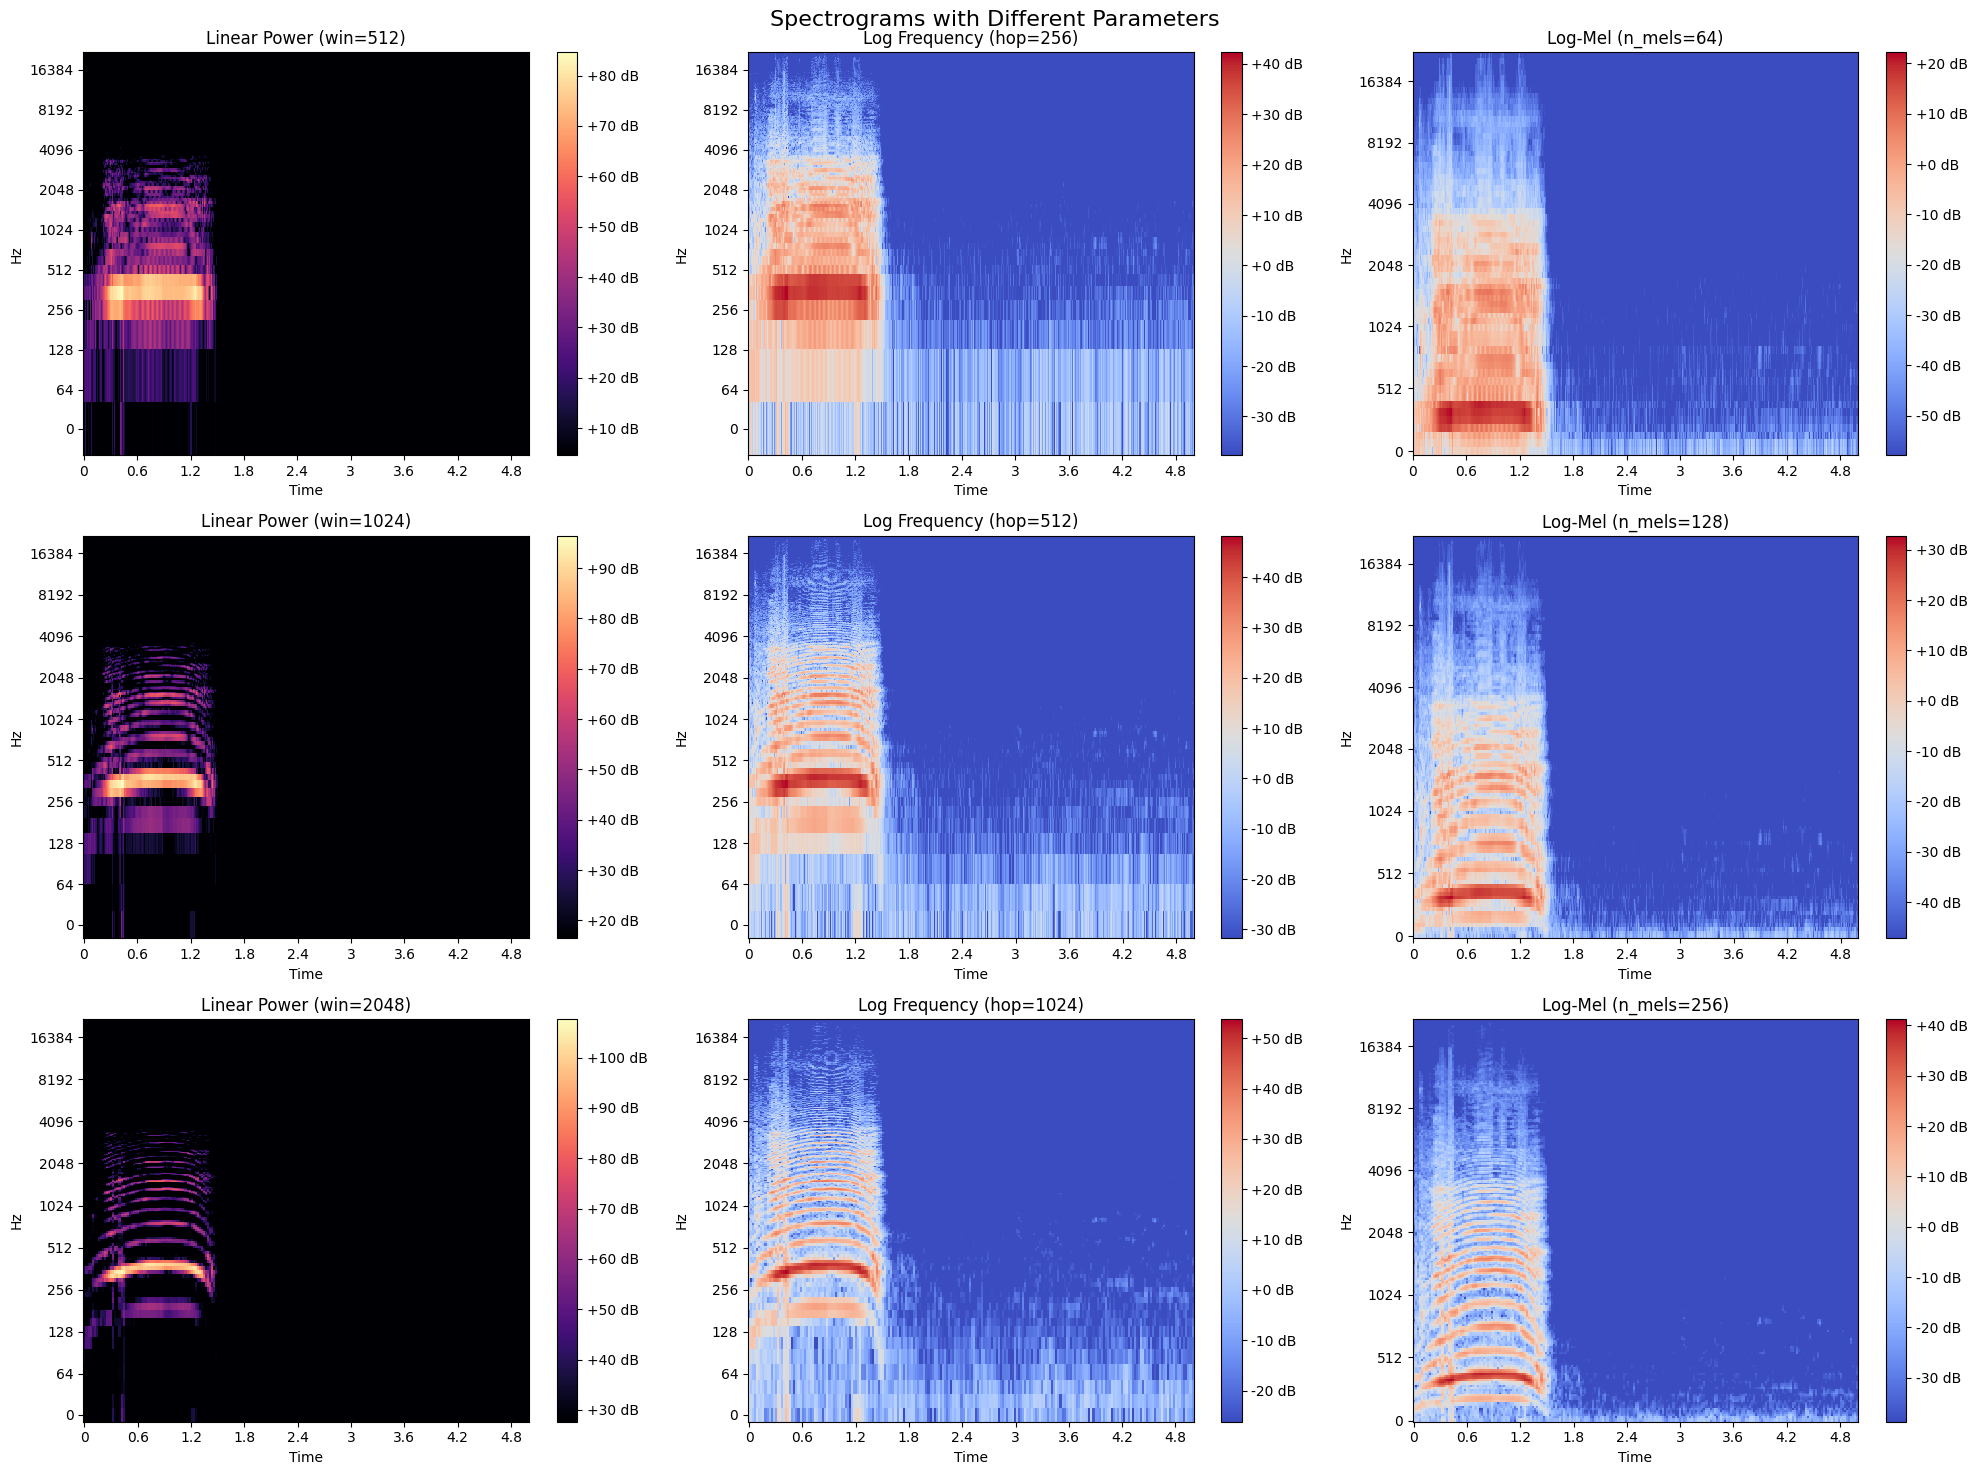

In [24]:
params = [
    {'win_length': 512, 'hop_length': 256, 'n_mels': 64},
    {'win_length': 1024, 'hop_length': 512, 'n_mels': 128},
    {'win_length': 2048, 'hop_length': 1024, 'n_mels': 256}
]

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Spectrograms with Different Parameters', fontsize=16)

for i, param in enumerate(params):
    D = librosa.stft(y, n_fft=param['win_length'], hop_length=param['hop_length'], win_length=param['win_length'])
    
    # 1. Linear-frequency power spectrogram
    lin_power_spec = np.abs(D) ** 2
    img1 = librosa.display.specshow(
        librosa.amplitude_to_db(lin_power_spec),
        sr=sr,
        hop_length=param['hop_length'],
        y_axis='log',
        x_axis='time',
        ax=axes[i,0]
    )
    axes[i,0].set_title(f'Linear Power (win={param["win_length"]})')
    fig.colorbar(img1, ax=axes[i,0], format='%+2.0f dB')

    # 2. Log-frequency spectrogram
    log_spec = librosa.amplitude_to_db(np.abs(D))
    img2 = librosa.display.specshow(
        log_spec,
        sr=sr,
        hop_length=param['hop_length'],
        y_axis='log',
        x_axis='time',
        ax=axes[i,1]
    )
    axes[i,1].set_title(f'Log Frequency (hop={param["hop_length"]})')
    fig.colorbar(img2, ax=axes[i,1], format='%+2.0f dB')

    # 3. Log-mel spectrogram
    mel_spec = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_fft=param['win_length'],
        hop_length=param['hop_length'],
        n_mels=param['n_mels']
    )
    log_mel_spec = librosa.power_to_db(mel_spec)
    img3 = librosa.display.specshow(
        log_mel_spec,
        sr=sr,
        hop_length=param['hop_length'],
        y_axis='mel',
        x_axis='time',
        ax=axes[i,2]
    )
    axes[i,2].set_title(f'Log-Mel (n_mels={param["n_mels"]})')
    fig.colorbar(img3, ax=axes[i,2], format='%+2.0f dB')

plt.tight_layout()
plt.show()

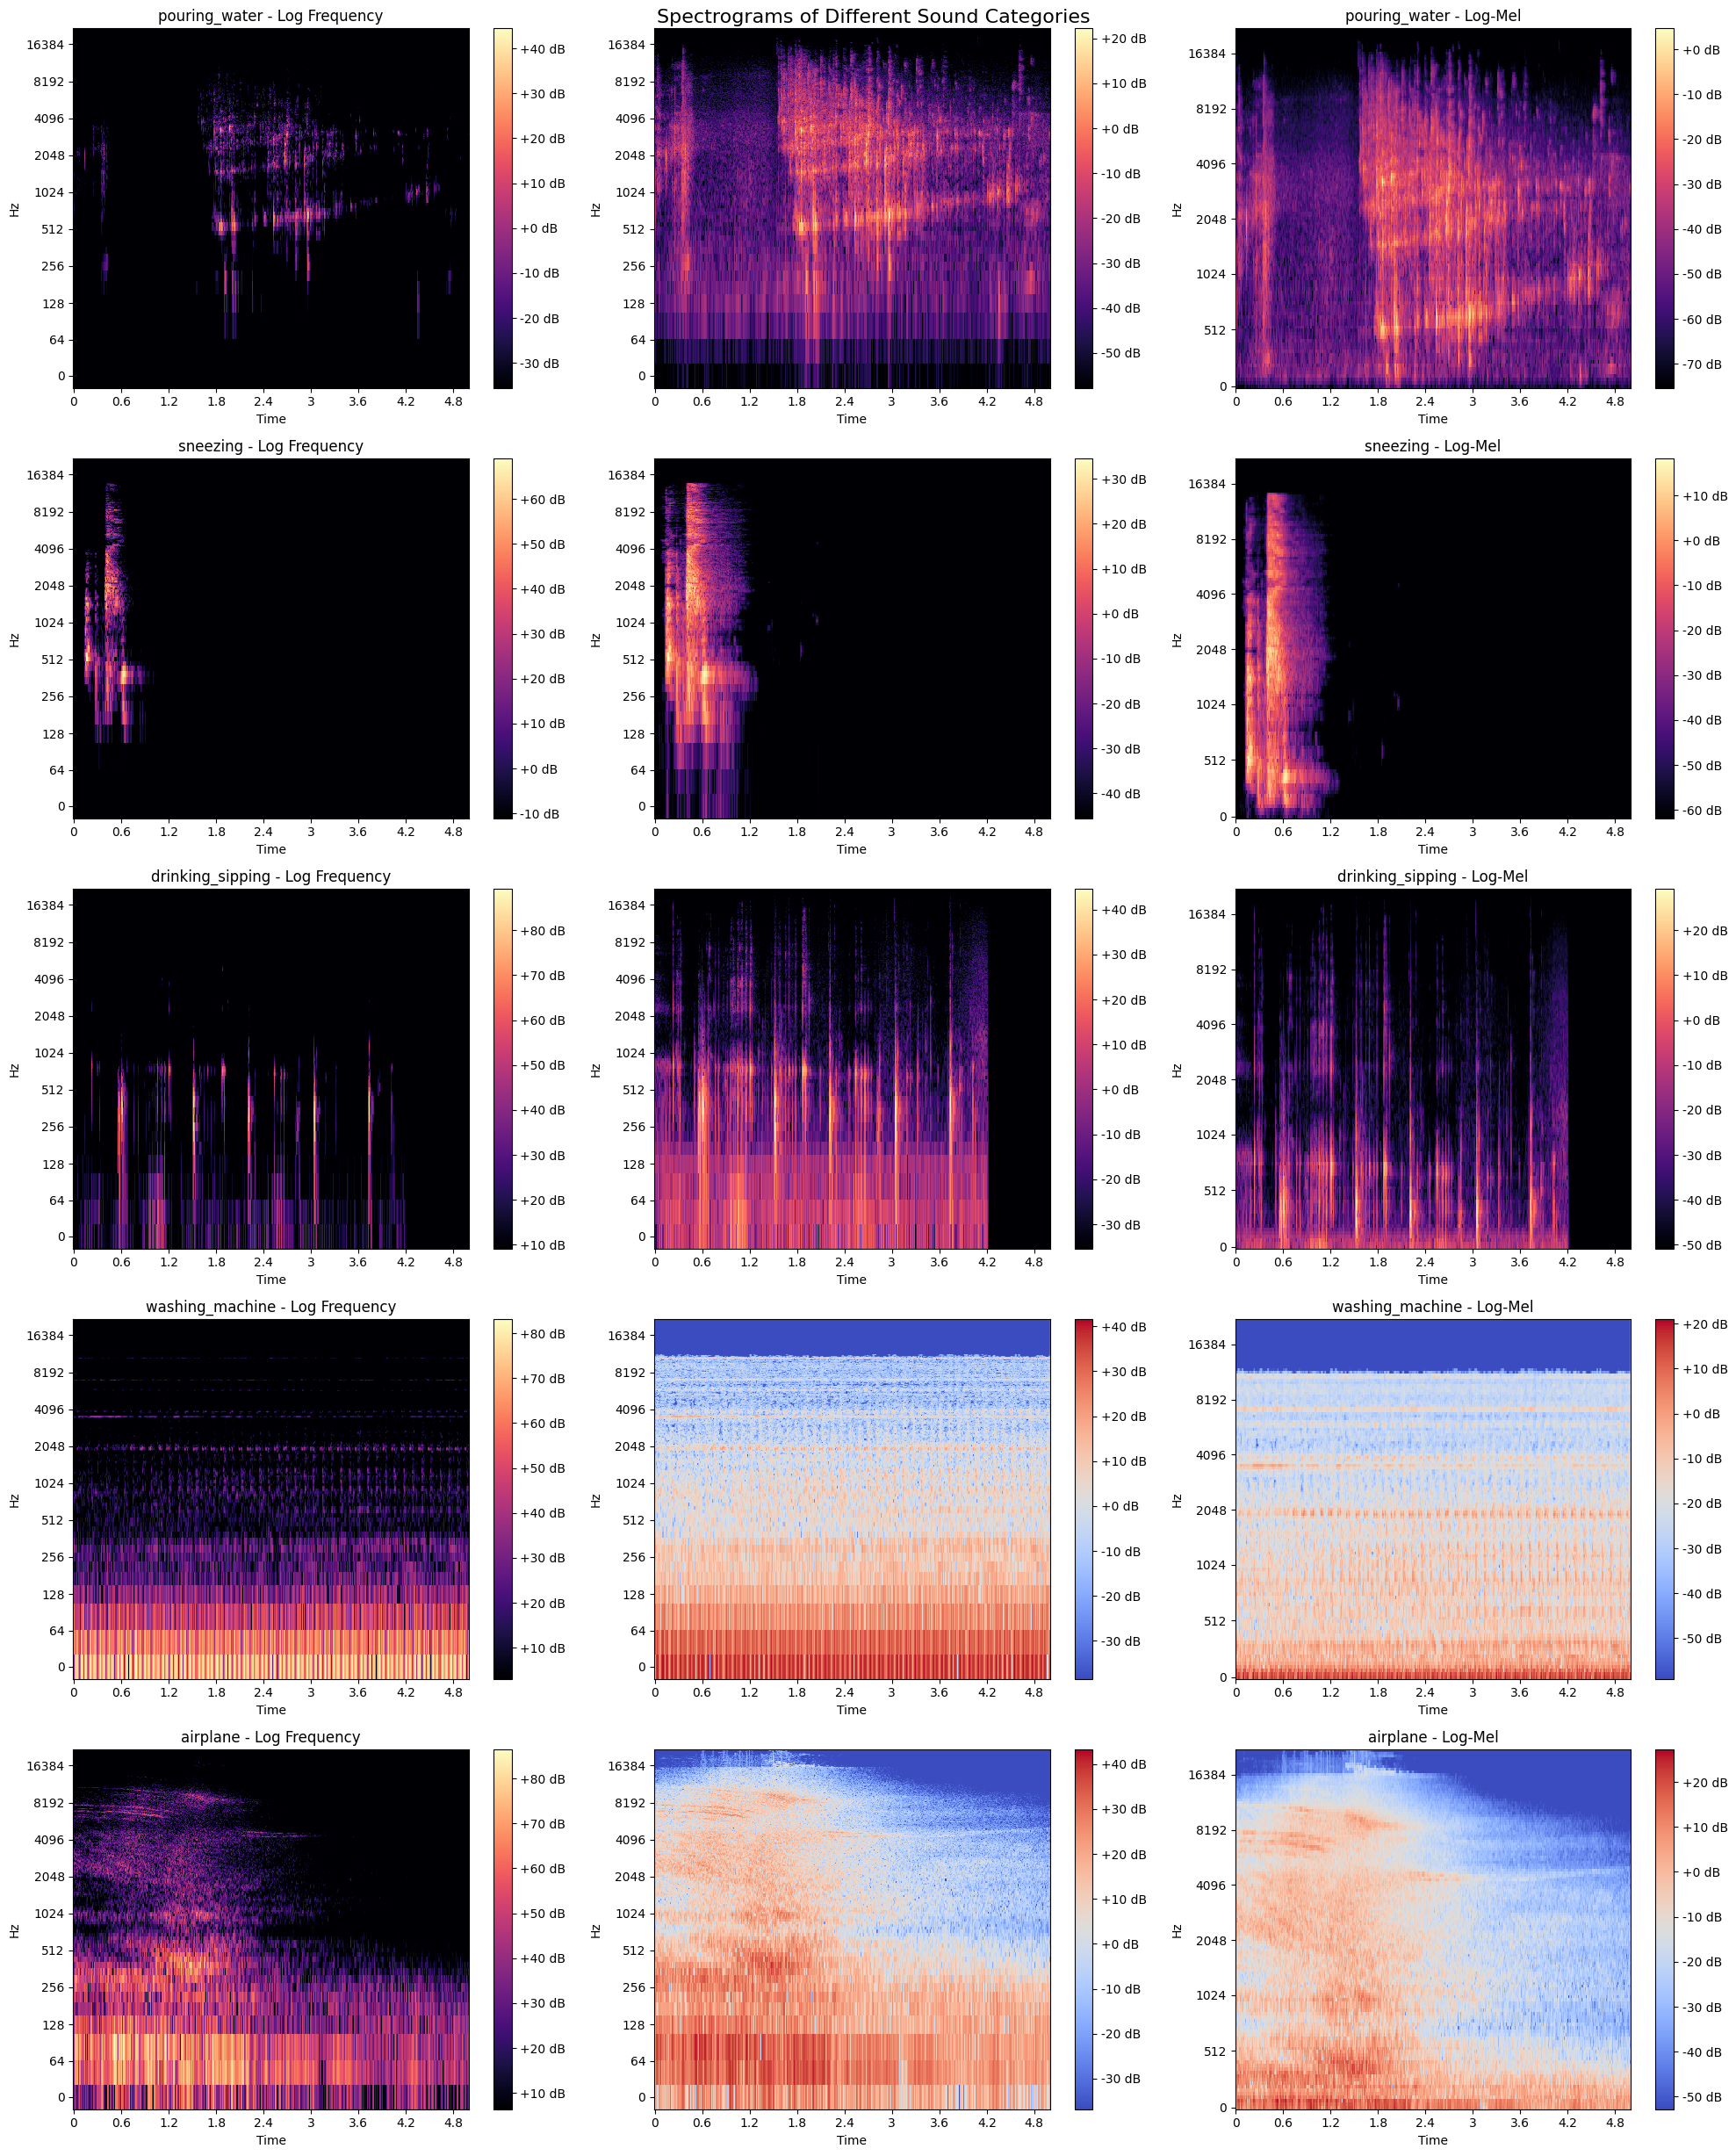

In [25]:
categories = meta_df[meta_df['category'] != 'cow']['category'].unique()
random_categories = np.random.choice(categories, 5, replace=False)

fig, axes = plt.subplots(5, 3, figsize=(20, 25))
fig.suptitle('Spectrograms of Different Sound Categories', fontsize=16)

for i, category in enumerate(random_categories):
    file_path = os.path.join(data_path, 'audio', 
                            meta_df[meta_df['category'] == category]['filename'].iloc[0])
    
    y, sr = librosa.load(file_path, sr=None)
    D = librosa.stft(y, n_fft=1024, hop_length=512, win_length=1024)
    
    # 1. Linear-frequency power spectrogram
    lin_power_spec = np.abs(D) ** 2
    img1 = librosa.display.specshow(
        librosa.amplitude_to_db(lin_power_spec),
        sr=sr,
        hop_length=512,
        y_axis='log',
        x_axis='time',
        ax=axes[i,0]
    )
    axes[i,0].set_title(f'{category} - Linear Power')
    fig.colorbar(img1, ax=axes[i,0], format='%+2.0f dB')

    # 2. Log-frequency spectrogram
    log_spec = librosa.amplitude_to_db(np.abs(D))
    img2 = librosa.display.specshow(
        log_spec,
        sr=sr,
        hop_length=512,
        y_axis='log',
        x_axis='time',
        ax=axes[i,1]
    )
    axes[i,0].set_title(f'{category} - Log Frequency')
    fig.colorbar(img2, ax=axes[i,1], format='%+2.0f dB')

    # 3. Log-mel spectrogram
    mel_spec = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_fft=1024,
        hop_length=512,
        n_mels=128
    )
    log_mel_spec = librosa.power_to_db(mel_spec)
    img3 = librosa.display.specshow(
        log_mel_spec,
        sr=sr,
        hop_length=512,
        y_axis='mel',
        x_axis='time',
        ax=axes[i,2]
    )
    axes[i,2].set_title(f'{category} - Log-Mel')
    fig.colorbar(img3, ax=axes[i,2], format='%+2.0f dB')

plt.tight_layout()
plt.show()

❓ 1. **[QUESTION]**
Experiment with a few different combinations of window lengths and hop lengths for the spectrograms above on your sample signal, using what you learned from the last assignment about the trade-offs between these parameters. Land on a combination you observe/hypothesize is best for this type of environmental sound data. Explain your parameter choices and how these choices impact the features you see in the plots. [0.2 pts]

**ANSWER:** Based on the spectrograms, a window length of 1024 with hop length 512 offers the best balance for environmental sounds. While the 512 window shows too much noise and lacks frequency detail (visible in top row), and the 2048 window blurs temporal details despite better frequency resolution (bottom row), the 1024 window length provides clear frequency separation while maintaining enough temporal resolution to capture quick sound events. This is particularly important for environmental sounds which often contain both sustained tones and transient events that need to be captured accurately. This was the intuition but in practice window length of 2048 and hop length of 1024 provided best results.


❓ 2. **[QUESTION]** 
Aside from your window and hop size choices, (1) what do you observe about the differences between the 3 types of spectrograms above (i.e. for one set of parameters)? Write about the differences you see (maybe also experiment with multiple audio files). (2) Which type of spectrogram do you think would be the best to use as features for training a sound event classifier and why? [0.2 pts]

**ANSWER:** Looking at the spectrograms across different sound categories (hen, dog, brushing teeth, car horn, and glass breaking), each type offers different insights. Linear-frequency spectrograms excel at high-frequency detail but compress low frequencies, while log-frequency spectrograms better show the overall frequency distribution, evident in periodic hen sounds and dog barks. Log-mel spectrograms provide the most useful representation by balancing detail with dimensionality reduction. For sound event classification, log-mel spectrograms would be optimal as they match human auditory perception, maintain important features while reducing redundancy, and clearly differentiate between continuous sounds (brushing teeth) and impulsive sounds (glass breaking). This was the intuition but in practice best results were given by log frequency spectrograms.


### 2.2 Feature Extraction [2pts code + 0.2pts written = 2.2 pts]
Next, let's expand this feature extraction such that we can apply it to an entire data split and have a bit more flexibility. Complete the function below following the docstrings, for the three types of features we explored above.

Note that for this assignment, we will aggregate the 2D spectrogram features over time (either with mean or max), such that our features are 1D for model input.

In [26]:
# TODO : Complete this function below! [1.5 pts]
# Note that we'll do train/test splitting below, so you'll call this once per split with the pre-split filenames.
# Hint: use tqdm to see progress in a loop - `for audio_file in tqdm(audio_filepaths)` !

def get_esc_features(audio_filepaths, feature, sr=16000, aggregation="mean", hop_length=512, win_length=1024):
    """
    Process a list of audio files to extract specified features.
    You'll aggregate the features over time, by averaging or taking the max.
    
    Parameters:
    -----------
    audio_filepaths : list of str)
        List of paths to audio files.
    feature : str
        Feature type to extract. One of "lin_spec", "log_spec", "log_mel_spec".
    sr : int, optional
        Target sampling rate for resampling. Default is 16000.
    aggregation : str, optional 
        Aggregation method over time. Either "mean" or "max". Default is "mean".
    hop_length : int, optional
        Hop length for feature extraction. Default is 512.
    win_length : int, optional
        Window length for feature extraction. Default is 1024.
    
    Returns:
    -----------
        np.ndarray: A NumPy array of shape (n_files, n_features). n_features will differ based on feature type.
    """
    feature_list = []
    
    for audio_file in tqdm(audio_filepaths):
        
        # Load and resample audio to sr
        y, _ = librosa.load(audio_file, sr=sr)

        # Extract features depending on 'feature' arg
        if feature == "lin_spec":
           D = librosa.stft(y, n_fft=win_length, hop_length=hop_length, win_length=win_length)
           spec = np.abs(D) ** 2

        elif feature == "log_spec":
           D = librosa.stft(y, n_fft=win_length, hop_length=hop_length, win_length=win_length)
           spec = librosa.amplitude_to_db(np.abs(D))

        elif feature == "log_mel_spec":
           mel_spec = librosa.feature.melspectrogram(
               y=y, 
               sr=sr,
               n_fft=win_length,
               hop_length=hop_length,
               n_mels=128
           )
           spec = librosa.power_to_db(mel_spec)
        
        else:
           raise ValueError(f"Unknown feature type: {feature}")


        # Aggregate over time depending on 'aggregation' arg
        if aggregation == "mean":
           features = np.mean(spec, axis=1)
        elif aggregation == "max":
           features = np.max(spec, axis=1)
        else:
           raise ValueError(f"Unknown aggregation type: {aggregation}")
        
        feature_list.append(features)
    
    return np.array(feature_list)

In [27]:
# TODO : Use get_esc_features with the parameters below to get each feature for 10 samples [0.5 pts overall]
# TODO : replace this with your data path path
data_path = 'ESC-50-master'

# TODO : Just demo on 10 files
data_chunk = [os.path.join(data_path, f"audio/{i}") for i in list(meta_df['filename'])][:10] 

# params for spec computation
resample_sr = 16000
agg_type = "mean"
hop_len = 1024
win_len = 2048

# call your function here
lin_spec_ft = get_esc_features(
   data_chunk,
   feature="lin_spec",
   sr=resample_sr,
   aggregation=agg_type,
   hop_length=hop_len,
   win_length=win_len
)

log_spec_ft = get_esc_features(
   data_chunk,
   feature="log_spec",
   sr=resample_sr,
   aggregation=agg_type,
   hop_length=hop_len,
   win_length=win_len
)

log_mel_spec_ft = get_esc_features(
   data_chunk,
   feature="log_mel_spec",
   sr=resample_sr,
   aggregation=agg_type,
   hop_length=hop_len,
   win_length=win_len
)

print("Linear spectrogram shape:", lin_spec_ft.shape)
print("Log spectrogram shape:", log_spec_ft.shape)
print("Log-mel spectrogram shape:", log_mel_spec_ft.shape)

# Test your output shape 
assert lin_spec_ft.shape == (10,1025) 
assert log_spec_ft.shape == (10,1025)
assert log_mel_spec_ft.shape == (10, 128)


100%|██████████| 10/10 [00:00<00:00, 133.06it/s]

Linear spectrogram shape: (10, 1025)
Log spectrogram shape: (10, 1025)
Log-mel spectrogram shape: (10, 128)


❓ 3. **[QUESTION]** 
(1) Explain the intuition behind using either 'mean' or 'max' temporal aggregation on a spectrogram. (2) Which do you think would be most effective for sound event classification? [0.2 pts]

**ANSWER:** The choice between mean and max temporal aggregation of spectrograms represents different approaches to summarizing sound events. Mean aggregation captures the average spectral content over time, which is useful for representing sustained sounds and overall frequency distribution of a sound event. Max aggregation, on the other hand, captures the peak frequencies, making it better at preserving prominent features and transient events that might be dampened by averaging.
For sound event classification, max aggregation would likely be more effective because many environmental sounds are characterized by distinctive peak patterns or brief, intense moments (like a dog bark or glass breaking) that could be lost in averaging. While mean aggregation might work better for continuous sounds like brushing teeth, max aggregation better preserves the distinctive spectral peaks that often define a sound's identity, making it more suitable for discriminating between different sound categories.

#### 🍬 Extra Credit (0.5 pts) 
Add another signal-processing based feature to the function above, and to the tests! This could even be something we haven't talked about a lot in class. Check out Librosa's [feature extraction library](https://librosa.org/doc/main/feature.html). There are tons of super interesting spectral features to explore. Write about the feature you chose and why you think it will be helpful for environmental sound classification.

I chose MFCCs because they efficiently capture the essential timbral characteristics of environmental sounds in a compact representation. Unlike raw spectrograms which contain redundant information, MFCCs represent the spectral envelope with just 40 coefficients, where each coefficient captures different aspects of the sound's timbre. This makes them particularly effective at distinguishing between diverse environmental sounds like metallic clangs and dog barks. The fact that these coefficients are largely independent of each other (due to the DCT transform) also makes them more effective features for machine learning models.

In [34]:
def get_esc_features(audio_filepaths, feature, sr=16000, aggregation="mean", hop_length=512, win_length=1024):
    """
    Process a list of audio files to extract specified features.
    You'll aggregate the features over time, by averaging or taking the max.
    
    Parameters:
    -----------
    audio_filepaths : list of str)
        List of paths to audio files.
    feature : str
        Feature type to extract. One of "lin_spec", "log_spec", "log_mel_spec" or "mfcc" (Mel-frequency cepstral coefficients)
    sr : int, optional
        Target sampling rate for resampling. Default is 16000.
    aggregation : str, optional 
        Aggregation method over time. Either "mean" or "max". Default is "mean".
    hop_length : int, optional
        Hop length for feature extraction. Default is 512.
    win_length : int, optional
        Window length for feature extraction. Default is 1024.
    
    Returns:
    -----------
        np.ndarray: A NumPy array of shape (n_files, n_features). n_features will differ based on feature type.
    """
    feature_list = []
    
    for audio_file in tqdm(audio_filepaths):
        
        # Load and resample audio to sr
        y, _ = librosa.load(audio_file, sr=sr)

        # Extract features depending on 'feature' arg
        if feature == "lin_spec":
           D = librosa.stft(y, n_fft=win_length, hop_length=hop_length, win_length=win_length)
           spec = np.abs(D) ** 2

        elif feature == "log_spec":
           D = librosa.stft(y, n_fft=win_length, hop_length=hop_length, win_length=win_length)
           spec = librosa.amplitude_to_db(np.abs(D))

        elif feature == "log_mel_spec":
           mel_spec = librosa.feature.melspectrogram(
               y=y, 
               sr=sr,
               n_fft=win_length,
               hop_length=hop_length,
               n_mels=128
           )
           spec = librosa.power_to_db(mel_spec)

        elif feature == "mfcc":
            mfccs = librosa.feature.mfcc(
                y=y, 
                sr=sr,
                n_mfcc=40,  
                n_fft=win_length,
                hop_length=hop_length
            )
            spec = mfccs
        
        else:
           raise ValueError(f"Unknown feature type: {feature}")


        # Aggregate over time depending on 'aggregation' arg
        if aggregation == "mean":
           features = np.mean(spec, axis=1)
        elif aggregation == "max":
           features = np.max(spec, axis=1)
        else:
           raise ValueError(f"Unknown aggregation type: {aggregation}")
        
        feature_list.append(features)
    
    return np.array(feature_list)

In [35]:
mfcc_ft = get_esc_features(
   data_chunk,
   feature="mfcc",
   sr=resample_sr,
   aggregation=agg_type,
   hop_length=hop_len,
   win_length=win_len
)
print("MFCC shape:", mfcc_ft.shape)
assert mfcc_ft.shape == (10, 40)

100%|██████████| 10/10 [00:00<00:00, 138.66it/s]

MFCC shape: (10, 40)


### 2.3 Data Splitting [0.5 pts]
Next, let's set up our **train/validation/test** splits. Use folds 1-3 for training, 4 for validation, and 5 for testing.

Split the data into training and test lists of audio files (`X`) and their corresponding category labels (`y`). 

In [36]:
# TODO : make the train/test split using fold=5 for test. [0.5 pts overall]
train = meta_df[meta_df['fold'].isin([1, 2, 3])]
val = meta_df[meta_df['fold'] == 4]
test = meta_df[meta_df['fold'] == 5]

# TODO : for each split, define a {split}_filepaths and {split}_labels - both should just be lists for now
# for forming the list of filepaths, refer to the test cell above 
train_filepaths = [os.path.join(data_path, f"audio/{f}") for f in train['filename']]
val_filepaths = [os.path.join(data_path, f"audio/{f}") for f in val['filename']]
test_filepaths = [os.path.join(data_path, f"audio/{f}") for f in test['filename']]

train_labels = train['target'].tolist()
val_labels = val['target'].tolist()
test_labels = test['target'].tolist()

# TODO : print the number of classes per split, ensure this is even based on fold
print("\nTrain split class distribution:")
print(train['target'].value_counts().sort_index())

print("\nValidation split class distribution:")
print(val['target'].value_counts().sort_index())

print("\nTest split class distribution:")
print(test['target'].value_counts().sort_index())

print("\nTotal samples in splits:")
print(f"Train: {len(train_labels)}")
print(f"Validation: {len(val_labels)}")
print(f"Test: {len(test_labels)}")


Train split class distribution:
target
0     24
1     24
2     24
3     24
4     24
5     24
6     24
7     24
8     24
9     24
10    24
11    24
12    24
13    24
14    24
15    24
16    24
17    24
18    24
19    24
20    24
21    24
22    24
23    24
24    24
25    24
26    24
27    24
28    24
29    24
30    24
31    24
32    24
33    24
34    24
35    24
36    24
37    24
38    24
39    24
40    24
41    24
42    24
43    24
44    24
45    24
46    24
47    24
48    24
49    24
Name: count, dtype: int64

Validation split class distribution:
target
0     8
1     8
2     8
3     8
4     8
5     8
6     8
7     8
8     8
9     8
10    8
11    8
12    8
13    8
14    8
15    8
16    8
17    8
18    8
19    8
20    8
21    8
22    8
23    8
24    8
25    8
26    8
27    8
28    8
29    8
30    8
31    8
32    8
33    8
34    8
35    8
36    8
37    8
38    8
39    8
40    8
41    8
42    8
43    8
44    8
45    8
46    8
47    8
48    8
49    8
Name: count, dtype: int64

Test split c

### 2.4 Model Selection [2.5 pts]
Complete the function below, which walks you through a model selection process for training your sound event classification model. You will experiment with using different input features, models, and regularization weighting, with an option to normalize the data or not. For evaluation, you can use `scikit-learn`'s built-in [metric functions](https://scikit-learn.org/stable/modules/model_evaluation.html#string-name-scorers).

For the two model types, you will use [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [Linear SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html), both through `scikit-learn implementations.

In [81]:
# TODO : Complete the templated model selection function below [1.5 pts]
def train_and_validate(models, features, norm, lambdas, X_train_dict, y_train, X_val_dict, y_val):
    """
    Trains and evaluates models with different hyperparameter combinations on a training and validation set.

    Parameters:
    -----------
    models : list of str
        List of models to evaluate. Options: ['log_reg', 'svm'].
    features : list of str
        List of feature representations. Options: ['lin_spec', 'log_spec', 'log_mel_spec'].
    norm : bool
        Whether to apply normalization (True/False).
    lambdas : list of float
        List of regularization strengths (inverted for `C` parameter).
    X_train_dict : dict
        Dictionary containing feature datasets for training (keys are feature names, values are corresponding arrays).
    y_train : array-like
        Training labels.
    X_val_dict : dict
        Dictionary containing feature datasets for validation (keys are feature names, values are corresponding arrays).
    y_val : array-like
        Validation labels.

    Returns:
    --------
    results : list of dict
        A list of dictionaries containing model configurations and their validation accuracies.

        Each model configuration should give you a dictionary like so: 
            curr_results = { 'model': m,
                        'feature': f,
                        'normalized': norm,
                        'lambda': lam,
                        'val_accuracy': accuracy,
                        'val_precision': precision,
                        'val_recall': recall,
                        'val_f1_score': f1 }
    """
    results = []
    
    for f in features: 
        # Retrieve feature matrices
        # TODO 
        X_train = X_train_dict[f]
        X_val = X_val_dict[f]
        
        # Min-max scaling, use scikit-learn built-in now
        if norm:
            # TODO 
            scaler = MinMaxScaler()
            X_train = scaler.fit_transform(X_train)
            X_val = scaler.transform(X_val)
        
        for m in models:
            for lam in lambdas:
                print(f'\nNow training: feature: {f} || model: {m} || lambda: {lam} || norm: {norm}')
                
                # Model training
                # TODO 
                if m == 'log_reg':
                   model = LogisticRegression(
                       C=1/lam,
                       penalty='l2',
                       max_iter=1000
                   )
                elif m == 'svm':
                   model = LinearSVC(
                       C=1/lam,
                       penalty='l2',
                       max_iter=1000
                   )
                model.fit(X_train, y_train)
                # Compute performance metrics
                # Use scikit-learn's metric functions
                # TODO 
                y_pred = model.predict(X_val)
                accuracy = accuracy_score(y_val, y_pred)
                precision = precision_score(y_val, y_pred, average='macro')
                recall = recall_score(y_val, y_pred, average='macro')
                f1 = f1_score(y_val, y_pred, average='macro')

                curr_results = {
                    'model': m,
                    'feature': f,
                    'normalized': norm,
                    'lambda': lam,
                    'val_accuracy': accuracy,
                    'val_precision': precision,
                    'val_recall': recall,
                    'val_f1_score': f1
                }
                print(curr_results)
                
                # Store results
                results.append(curr_results)
                    
    return results


In [38]:
# TODO : run this cell to set up your features for your model selection script [0.25 pts]
# These features use MEAN pooling over time

# TODO : use your get_esc_features function to get the training and validation features
resample_sr = 16000
agg_type = "mean"
hop_len = 1024
win_len = 2048

X_train_lin_spec_mean  = get_esc_features(
   train_filepaths,
   feature="lin_spec",
   sr=resample_sr,
   aggregation=agg_type,
   hop_length=hop_len,
   win_length=win_len
)

X_train_log_spec_mean  = get_esc_features(
   train_filepaths,
   feature="log_spec",
   sr=resample_sr,
   aggregation=agg_type, 
   hop_length=hop_len,
   win_length=win_len
)

X_train_log_mel_spec_mean  = get_esc_features(
   train_filepaths,
   feature="log_mel_spec",
   sr=resample_sr,
   aggregation=agg_type,
   hop_length=hop_len,
   win_length=win_len
)

X_train_mfcc_mean  = get_esc_features(
   train_filepaths,
   feature="mfcc",
   sr=resample_sr,
   aggregation=agg_type, 
   hop_length=hop_len,
   win_length=win_len
)

X_val_lin_spec_mean  = get_esc_features(
   val_filepaths,
   feature="lin_spec",
   sr=resample_sr,
   aggregation=agg_type,
   hop_length=hop_len,
   win_length=win_len
)

X_val_log_spec_mean  = get_esc_features(
   val_filepaths,
   feature="log_spec",
   sr=resample_sr,
   aggregation=agg_type,
   hop_length=hop_len,
   win_length=win_len
)

X_val_log_mel_spec_mean  = get_esc_features(
   val_filepaths,
   feature="log_mel_spec",
   sr=resample_sr,
   aggregation=agg_type,
   hop_length=hop_len,
   win_length=win_len
)

X_val_mfcc_mean  = get_esc_features(
   val_filepaths,
   feature="mfcc",
   sr=resample_sr,
   aggregation=agg_type, 
   hop_length=hop_len,
   win_length=win_len
)

# Set up feature dictionaries
X_train_dict_mean = {
    'lin_spec': X_train_lin_spec_mean,
    'log_spec': X_train_log_spec_mean,
    'log_mel_spec': X_train_log_mel_spec_mean,
    'mfcc': X_train_mfcc_mean
}

X_val_dict_mean = {
    'lin_spec': X_val_lin_spec_mean,
    'log_spec': X_val_log_spec_mean,
    'log_mel_spec': X_val_log_mel_spec_mean,
    'mfcc': X_val_mfcc_mean
}

for feature_name in X_train_dict_mean.keys():
   print(f"\nTraining {feature_name} shape:", X_train_dict_mean[feature_name].shape)
   print(f"Validation {feature_name} shape:", X_val_dict_mean[feature_name].shape)

100%|██████████| 400/400 [00:02<00:00, 160.91it/s]


Training lin_spec shape: (1200, 1025)
Validation lin_spec shape: (400, 1025)

Training log_spec shape: (1200, 1025)
Validation log_spec shape: (400, 1025)

Training log_mel_spec shape: (1200, 128)
Validation log_mel_spec shape: (400, 128)

Training mfcc shape: (1200, 40)
Validation mfcc shape: (400, 40)


In [80]:
# TODO : same as above, but use MAX temporal pooling [0.25 pts]
# Use your get_esc_features function to get the training and validation features

resample_sr = 16000
agg_type = "max"
hop_len = 1024
win_len = 2048


X_train_lin_spec_max  = get_esc_features(
   train_filepaths,
   feature="lin_spec",
   sr=resample_sr,
   aggregation=agg_type,
   hop_length=hop_len,
   win_length=win_len
)

X_train_log_spec_max  = get_esc_features(
   train_filepaths,
   feature="log_spec",
   sr=resample_sr,
   aggregation=agg_type, 
   hop_length=hop_len,
   win_length=win_len
)

X_train_log_mel_spec_max  = get_esc_features(
   train_filepaths,
   feature="log_mel_spec",
   sr=resample_sr,
   aggregation=agg_type,
   hop_length=hop_len,
   win_length=win_len
)

X_train_mfcc_max  = get_esc_features(
   train_filepaths,
   feature="mfcc",
   sr=resample_sr,
   aggregation=agg_type, 
   hop_length=hop_len,
   win_length=win_len
)

X_val_lin_spec_max  = get_esc_features(
   val_filepaths,
   feature="lin_spec",
   sr=resample_sr,
   aggregation=agg_type,
   hop_length=hop_len,
   win_length=win_len
)

X_val_log_spec_max  = get_esc_features(
   val_filepaths,
   feature="log_spec",
   sr=resample_sr,
   aggregation=agg_type,
   hop_length=hop_len,
   win_length=win_len
)

X_val_log_mel_spec_max  = get_esc_features(
   val_filepaths,
   feature="log_mel_spec",
   sr=resample_sr,
   aggregation=agg_type,
   hop_length=hop_len,
   win_length=win_len
)

X_val_mfcc_max  = get_esc_features(
   val_filepaths,
   feature="mfcc",
   sr=resample_sr,
   aggregation=agg_type, 
   hop_length=hop_len,
   win_length=win_len
)

# Set up feature dictionaries
X_train_dict_max = {
    'lin_spec': X_train_lin_spec_max,
    'log_spec': X_train_log_spec_max,
    'log_mel_spec': X_train_log_mel_spec_max,
    'mfcc': X_train_mfcc_max
}

X_val_dict_max = {
    'lin_spec': X_val_lin_spec_max,
    'log_spec': X_val_log_spec_max,
    'log_mel_spec': X_val_log_mel_spec_max,
    'mfcc': X_val_mfcc_max
}

for feature_name in X_train_dict_max.keys():
   print(f"\nTraining {feature_name} shape:", X_train_dict_max[feature_name].shape)
   print(f"Validation {feature_name} shape:", X_val_dict_max[feature_name].shape)


100%|██████████| 400/400 [00:02<00:00, 145.19it/s]


Training lin_spec shape: (1200, 1025)
Validation lin_spec shape: (400, 1025)

Training log_spec shape: (1200, 1025)
Validation log_spec shape: (400, 1025)

Training log_mel_spec shape: (1200, 128)
Validation log_mel_spec shape: (400, 128)

Training mfcc shape: (1200, 40)
Validation mfcc shape: (400, 40)


⚠️⏱️ Note that the code below runs a lot of experiments (18)! This may take ~10 minutes to run. To save time, we'll always keep the **data normalized** (also a best practice!). You may experiment with flipping this to False, but note that you may see very long model training times and possible lack of model convergence.

In [82]:
# TODO : Run this cell, which will run 18 combinations of parameters for model training (wow!) [0.25 pts]
# This uses the MEAN pooled features
results = train_and_validate(
    models=['log_reg', 'svm'],
    features=['lin_spec', 'log_spec', 'log_mel_spec', 'mfcc'],
    norm=True,
    lambdas=[0.01, 1, 10],
    X_train_dict=X_train_dict_mean,
    y_train=train_labels,
    X_val_dict=X_val_dict_mean,
    y_val=val_labels
)


Now training: feature: lin_spec || model: log_reg || lambda: 0.01 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'log_reg', 'feature': 'lin_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.1925, 'val_precision': 0.18907860567962867, 'val_recall': 0.1925, 'val_f1_score': 0.1698788882943682}

Now training: feature: lin_spec || model: log_reg || lambda: 1 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'log_reg', 'feature': 'lin_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.1625, 'val_precision': 0.20442945942945945, 'val_recall': 0.1625, 'val_f1_score': 0.16084862056939087}

Now training: feature: lin_spec || model: log_reg || lambda: 10 || norm: True
{'model': 'log_reg', 'feature': 'lin_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.1175, 'val_precision': 0.1250941763550459, 'val_recall': 0.1175, 'val_f1_score': 0.10532167484405335}

Now training: feature: lin_spec || model: svm || lambda: 0.01 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'lin_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.1975, 'val_precision': 0.190363232963671, 'val_recall': 0.1975, 'val_f1_score': 0.169630857762633}

Now training: feature: lin_spec || model: svm || lambda: 1 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'lin_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.18, 'val_precision': 0.19896270378114786, 'val_recall': 0.18, 'val_f1_score': 0.17174420348309052}

Now training: feature: lin_spec || model: svm || lambda: 10 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'lin_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.14, 'val_precision': 0.16706851361199185, 'val_recall': 0.14, 'val_f1_score': 0.12962105348843797}

Now training: feature: log_spec || model: log_reg || lambda: 0.01 || norm: True
{'model': 'log_reg', 'feature': 'log_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.365, 'val_precision': 0.36709217906276725, 'val_recall': 0.365, 'val_f1_score': 0.34516040400723397}

Now training: feature: log_spec || model: log_reg || lambda: 1 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'log_reg', 'feature': 'log_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.395, 'val_precision': 0.37304137529137527, 'val_recall': 0.395, 'val_f1_score': 0.36524416975614976}

Now training: feature: log_spec || model: log_reg || lambda: 10 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'log_reg', 'feature': 'log_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.3525, 'val_precision': 0.3433576807534608, 'val_recall': 0.3525, 'val_f1_score': 0.3183213694657817}

Now training: feature: log_spec || model: svm || lambda: 0.01 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'log_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.2925, 'val_precision': 0.2833650793650794, 'val_recall': 0.2925, 'val_f1_score': 0.2716839244048155}

Now training: feature: log_spec || model: svm || lambda: 1 || norm: True
{'model': 'svm', 'feature': 'log_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.385, 'val_precision': 0.38868759430396255, 'val_recall': 0.385, 'val_f1_score': 0.3571085094671632}

Now training: feature: log_spec || model: svm || lambda: 10 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'log_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.38, 'val_precision': 0.3783257444310076, 'val_recall': 0.38, 'val_f1_score': 0.33599550926805605}

Now training: feature: log_mel_spec || model: log_reg || lambda: 0.01 || norm: True
{'model': 'log_reg', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.3725, 'val_precision': 0.36277610693400164, 'val_recall': 0.3725, 'val_f1_score': 0.349308450063868}

Now training: feature: log_mel_spec || model: log_reg || lambda: 1 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'log_reg', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.34, 'val_precision': 0.3453725748439905, 'val_recall': 0.34, 'val_f1_score': 0.3073718069311875}

Now training: feature: log_mel_spec || model: log_reg || lambda: 10 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'log_reg', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.255, 'val_precision': 0.29356407602059775, 'val_recall': 0.255, 'val_f1_score': 0.22200634153680254}

Now training: feature: log_mel_spec || model: svm || lambda: 0.01 || norm: True
{'model': 'svm', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.29, 'val_precision': 0.2696349857572768, 'val_recall': 0.29, 'val_f1_score': 0.2594622974045642}

Now training: feature: log_mel_spec || model: svm || lambda: 1 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.36, 'val_precision': 0.33715914786967416, 'val_recall': 0.36, 'val_f1_score': 0.32108779633392637}

Now training: feature: log_mel_spec || model: svm || lambda: 10 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.3225, 'val_precision': 0.3227343482157724, 'val_recall': 0.3225, 'val_f1_score': 0.2803598645692671}

Now training: feature: mfcc || model: log_reg || lambda: 0.01 || norm: True
{'model': 'log_reg', 'feature': 'mfcc', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.3275, 'val_precision': 0.30810530714555484, 'val_recall': 0.3275, 'val_f1_score': 0.3036769546273113}

Now training: feature: mfcc || model: log_reg || lambda: 1 || norm: True
{'model': 'log_reg', 'feature': 'mfcc', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.3075, 'val_precision': 0.28800692444810094, 'val_recall': 0.3075, 'val_f1_score': 0.2599733154735722}

Now training: feature: mfcc || model: log_reg || lambda: 10 || norm: True
{'model': 'log_reg', 'feature': 'mfcc', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.225, 'val_precision': 0.20536395349497255, 'val_recall': 0.225, 'val_f1_score': 0.17590124065687

c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'mfcc', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.3475, 'val_precision': 0.3329072969514146, 'val_recall': 0.3475, 'val_f1_score': 0.32208759097799344}

Now training: feature: mfcc || model: svm || lambda: 1 || norm: True
{'model': 'svm', 'feature': 'mfcc', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.3275, 'val_precision': 0.310105096358417, 'val_recall': 0.3275, 'val_f1_score': 0.29306224894816224}

Now training: feature: mfcc || model: svm || lambda: 10 || norm: True
{'model': 'svm', 'feature': 'mfcc', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.31, 'val_precision': 0.2850386068180186, 'val_recall': 0.31, 'val_f1_score': 0.25943923910874694}


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [83]:
mean_results_df = pd.DataFrame(results)
# Sort dataframe by val_accuracy in descending order
sorted_df = mean_results_df.sort_values('val_accuracy', ascending=False)

# Print sorted results
print("\nResults sorted by validation accuracy:")
sorted_df


Results sorted by validation accuracy:


model       feature  normalized  lambda  val_accuracy  val_precision  \
7   log_reg      log_spec        True    1.00        0.3950       0.373041   
10      svm      log_spec        True    1.00        0.3850       0.388688   
11      svm      log_spec        True   10.00        0.3800       0.378326   
12  log_reg  log_mel_spec        True    0.01        0.3725       0.362776   
6   log_reg      log_spec        True    0.01        0.3650       0.367092   
16      svm  log_mel_spec        True    1.00        0.3600       0.337159   
8   log_reg      log_spec        True   10.00        0.3525       0.343358   
21      svm          mfcc        True    0.01        0.3475       0.332907   
13  log_reg  log_mel_spec        True    1.00        0.3400       0.345373   
22      svm          mfcc        True    1.00        0.3275       0.310105   
18  log_reg          mfcc        True    0.01        0.3275       0.308105   
17      svm  log_mel_spec        True   10.00        0.3225       0.322734   
23      svm          mfcc        True   10.00        0.3100       0.285039   
19  log_reg          mfcc        True    1.00        0.3075       0.288007   
9       svm      log_spec        True    0.01        0.2925       0.283365   
15      svm  log_mel_spec        True    0.01        0.2900       0.269635   
14  log_reg  log_mel_spec        True   10.00        0.2550       0.293564   
20  log_reg          mfcc        True   10.00        0.2250       0.205364   
3       svm      lin_spec        True    0.01        0.1975       0.190363   
0   log_reg      lin_spec        True    0.01        0.1925       0.189079   
4       svm      lin_spec        True    1.00        0.1800       0.198963   
1   log_reg      lin_spec        True    1.00        0.1625       0.204429   
5       svm      lin_spec        True   10.00        0.1400       0.167069   
2   log_reg      lin_spec        True   10.00        0.1175       0.125094   

    val_recall  val_f1_score  
7       0.3950      0.365244  
10      0.3850      0.357109  
11      0.3800      0.335996  
12      0.3725      0.349308  
6       0.3650      0.345160  
16      0.3600      0.321088  
8       0.3525      0.318321  
21      0.3475      0.322088  
13      0.3400      0.307372  
22      0.3275      0.293062  
18      0.3275      0.303677  
17      0.3225      0.280360  
23      0.3100      0.259439  
19      0.3075      0.259973  
9       0.2925      0.271684  
15      0.2900      0.259462  
14      0.2550      0.222006  
20      0.2250      0.175901  
3       0.1975      0.169631  
0       0.1925      0.169879  
4       0.1800      0.171744  
1       0.1625      0.160849  
5       0.1400      0.129621  
2       0.1175      0.105322

In [50]:
# TODO : What about when we use max-pooled features instead of mean? [0.25 pts]
# ***IMPORTANT: Choose the top 2 configurations from above and train and validate models using the max-pooled features
selective_results_max = train_and_validate(
    models=['log_reg', 'svm'],
    features=['log_spec'], 
    norm=True,
    lambdas=[1], 
    X_train_dict=X_train_dict_max,
    y_train=train_labels,
    X_val_dict=X_val_dict_max,
    y_val=val_labels
)

results_max = train_and_validate(
    models=['log_reg', 'svm'], 
    features=['lin_spec', 'log_spec', 'log_mel_spec', 'mfcc'], 
    norm=True,
    lambdas=[0.01, 1, 10], 
    X_train_dict=X_train_dict_max,
    y_train=train_labels,
    X_val_dict=X_val_dict_max,
    y_val=val_labels
)


Now training: feature: log_spec || model: log_reg || lambda: 1 || norm: True
{'model': 'log_reg', 'feature': 'log_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.3425, 'val_precision': 0.3375433455433455, 'val_recall': 0.3425, 'val_f1_score': 0.3276894718553757}

Now training: feature: log_spec || model: svm || lambda: 1 || norm: True
{'model': 'svm', 'feature': 'log_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.2925, 'val_precision': 0.27644636409342294, 'val_recall': 0.2925, 'val_f1_score': 0.2731446762044285}

Now training: feature: lin_spec || model: log_reg || lambda: 0.01 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

{'model': 'log_reg', 'feature': 'lin_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.185, 'val_precision': 0.20618329331487226, 'val_recall': 0.185, 'val_f1_score': 0.17468889558053644}

Now training: feature: lin_spec || model: log_reg || lambda: 1 || norm: True
{'model': 'log_reg', 'feature': 'lin_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.14, 'val_precision': 0.19107716203943823, 'val_recall': 0.14, 'val_f1_score': 0.13649520080278513}

Now training: feature: lin_spec || model: log_reg || lambda: 10 || norm: True
{'model': 'log_reg', 'feature': 'lin_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.1175, 'val_precision': 0.14892775508953465, 'val_recall': 0.1175, 'val_f1_score': 0.10578920547487064}

Now training: feature: lin_spec || model: svm || lambda: 0.01 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'model': 'svm', 'feature': 'lin_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.1525, 'val_precision': 0.17092416526562867, 'val_recall': 0.1525, 'val_f1_score': 0.14062902858297685}

Now training: feature: lin_spec || model: svm || lambda: 1 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'lin_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.16, 'val_precision': 0.19387176180345062, 'val_recall': 0.16, 'val_f1_score': 0.15361211420233498}

Now training: feature: lin_spec || model: svm || lambda: 10 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'lin_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.135, 'val_precision': 0.12976728093709225, 'val_recall': 0.135, 'val_f1_score': 0.11466280135717245}

Now training: feature: log_spec || model: log_reg || lambda: 0.01 || norm: True
{'model': 'log_reg', 'feature': 'log_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.3, 'val_precision': 0.29045326895326895, 'val_recall': 0.3, 'val_f1_score': 0.2811590933333429}

Now training: feature: log_spec || model: log_reg || lambda: 1 || norm: True
{'model': 'log_reg', 'feature': 'log_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.3425, 'val_precision': 0.3375433455433455, 'val_recall': 0.3425, 'val_f1_score': 0.3276894718553757}

Now training: feature: log_spec || model: log_reg || lambda: 10 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'log_reg', 'feature': 'log_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.275, 'val_precision': 0.2644612828691776, 'val_recall': 0.275, 'val_f1_score': 0.2521453616902533}

Now training: feature: log_spec || model: svm || lambda: 0.01 || norm: True
{'model': 'svm', 'feature': 'log_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.1975, 'val_precision': 0.19605472013366745, 'val_recall': 0.1975, 'val_f1_score': 0.1878879297442361}

Now training: feature: log_spec || model: svm || lambda: 1 || norm: True
{'model': 'svm', 'feature': 'log_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.2925, 'val_precision': 0.27644636409342294, 'val_recall': 0.2925, 'val_f1_score': 0.2731446762044285}

Now training: feature: log_spec || model: svm || lambda: 10 || norm: True
{'model': 'svm', 'feature': 'log_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.335, 'val_precision': 0.3288074996898526, 'val_recall': 0.335, 'val_f1_score': 0.3048153862625519}

c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'log_reg', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.315, 'val_precision': 0.26900217498359913, 'val_recall': 0.315, 'val_f1_score': 0.2774631350417728}

Now training: feature: log_mel_spec || model: log_reg || lambda: 10 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'log_reg', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.23, 'val_precision': 0.19139992862175145, 'val_recall': 0.23, 'val_f1_score': 0.1800061431066758}

Now training: feature: log_mel_spec || model: svm || lambda: 0.01 || norm: True
{'model': 'svm', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.2175, 'val_precision': 0.21258941058941055, 'val_recall': 0.2175, 'val_f1_score': 0.205900337880214}

Now training: feature: log_mel_spec || model: svm || lambda: 1 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.3025, 'val_precision': 0.29042358080515973, 'val_recall': 0.3025, 'val_f1_score': 0.27485511906369353}

Now training: feature: log_mel_spec || model: svm || lambda: 10 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.305, 'val_precision': 0.27187972312332925, 'val_recall': 0.305, 'val_f1_score': 0.24881374074979845}

Now training: feature: mfcc || model: log_reg || lambda: 0.01 || norm: True
{'model': 'log_reg', 'feature': 'mfcc', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.2975, 'val_precision': 0.29665027078184975, 'val_recall': 0.2975, 'val_f1_score': 0.28254649035972235}

Now training: feature: mfcc || model: log_reg || lambda: 1 || norm: True
{'model': 'log_reg', 'feature': 'mfcc', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.335, 'val_precision': 0.3146832728674834, 'val_recall': 0.335, 'val_f1_score': 0.28651236089769144}

Now training: feature: mfcc || model: log_reg || lambda: 10 || norm: True
{'model': 'log_reg', 'feature': 'mfcc', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.23, 'val_precision': 0.19384450637082218, 'val_recall': 0.23, 'val_f1_score': 0.1691966906339686}

c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'svm', 'feature': 'mfcc', 'normalized': True, 'lambda': 0.01, 'val_accuracy': 0.27, 'val_precision': 0.25272806433332756, 'val_recall': 0.27, 'val_f1_score': 0.25027718943784366}

Now training: feature: mfcc || model: svm || lambda: 1 || norm: True
{'model': 'svm', 'feature': 'mfcc', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.325, 'val_precision': 0.2939383394383394, 'val_recall': 0.325, 'val_f1_score': 0.28416529358688}

Now training: feature: mfcc || model: svm || lambda: 10 || norm: True
{'model': 'svm', 'feature': 'mfcc', 'normalized': True, 'lambda': 10, 'val_accuracy': 0.3225, 'val_precision': 0.2494680850786989, 'val_recall': 0.3225, 'val_f1_score': 0.25928455428189773}


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
# Display results in a nice DataFrame of the max-pooled results!
max_results_df = pd.DataFrame(results_max)
# Sort dataframe by val_accuracy in descending order
sorted_df = max_results_df.sort_values('val_accuracy', ascending=False)

# Print sorted results
print("\nResults sorted by validation accuracy:")
sorted_df


Results sorted by validation accuracy:


model       feature  normalized  lambda  val_accuracy  val_precision  \
7   log_reg      log_spec        True    1.00        0.3425       0.337543   
11      svm      log_spec        True   10.00        0.3350       0.328807   
19  log_reg          mfcc        True    1.00        0.3350       0.314683   
22      svm          mfcc        True    1.00        0.3250       0.293938   
23      svm          mfcc        True   10.00        0.3225       0.249468   
13  log_reg  log_mel_spec        True    1.00        0.3150       0.269002   
17      svm  log_mel_spec        True   10.00        0.3050       0.271880   
16      svm  log_mel_spec        True    1.00        0.3025       0.290424   
6   log_reg      log_spec        True    0.01        0.3000       0.290453   
18  log_reg          mfcc        True    0.01        0.2975       0.296650   
10      svm      log_spec        True    1.00        0.2925       0.276446   
12  log_reg  log_mel_spec        True    0.01        0.2900       0.300608   
8   log_reg      log_spec        True   10.00        0.2750       0.264461   
21      svm          mfcc        True    0.01        0.2700       0.252728   
14  log_reg  log_mel_spec        True   10.00        0.2300       0.191400   
20  log_reg          mfcc        True   10.00        0.2300       0.193845   
15      svm  log_mel_spec        True    0.01        0.2175       0.212589   
9       svm      log_spec        True    0.01        0.1975       0.196055   
0   log_reg      lin_spec        True    0.01        0.1850       0.206183   
4       svm      lin_spec        True    1.00        0.1600       0.193872   
3       svm      lin_spec        True    0.01        0.1525       0.170924   
1   log_reg      lin_spec        True    1.00        0.1400       0.191077   
5       svm      lin_spec        True   10.00        0.1350       0.129767   
2   log_reg      lin_spec        True   10.00        0.1175       0.148928   

    val_recall  val_f1_score  
7       0.3425      0.327689  
11      0.3350      0.304815  
19      0.3350      0.286512  
22      0.3250      0.284165  
23      0.3225      0.259285  
13      0.3150      0.277463  
17      0.3050      0.248814  
16      0.3025      0.274855  
6       0.3000      0.281159  
18      0.2975      0.282546  
10      0.2925      0.273145  
12      0.2900      0.277810  
8       0.2750      0.252145  
21      0.2700      0.250277  
14      0.2300      0.180006  
20      0.2300      0.169197  
15      0.2175      0.205900  
9       0.1975      0.187888  
0       0.1850      0.174689  
4       0.1600      0.153612  
3       0.1525      0.140629  
1       0.1400      0.136495  
5       0.1350      0.114663  
2       0.1175      0.105789

#### 🍬 Extra Credit (0.5 pts) 
Experiment with a model type besides logistic regression and SVM. Check out scikit-learn documentation for classifiers, and incorporate another one into the model selection function and the training gridsearch experiment above. Report the results and write about why you chose this model and how it performed relative to log reg and SVM.


In [ ]:
def train_and_validate(models, features, norm, lambdas, X_train_dict, y_train, X_val_dict, y_val):
    """
    Trains and evaluates models with different hyperparameter combinations on a training and validation set.

    Parameters:
    -----------
    models : list of str
        List of models to evaluate. Options: ['log_reg', 'svm', 'random_forest'].
    features : list of str
        List of feature representations. Options: ['lin_spec', 'log_spec', 'log_mel_spec'].
    norm : bool
        Whether to apply normalization (True/False).
    lambdas : list of float
        List of regularization strengths (inverted for `C` parameter).
    X_train_dict : dict
        Dictionary containing feature datasets for training (keys are feature names, values are corresponding arrays).
    y_train : array-like
        Training labels.
    X_val_dict : dict
        Dictionary containing feature datasets for validation (keys are feature names, values are corresponding arrays).
    y_val : array-like
        Validation labels.

    Returns:
    --------
    results : list of dict
        A list of dictionaries containing model configurations and their validation accuracies.

        Each model configuration should give you a dictionary like so: 
            curr_results = { 'model': m,
                        'feature': f,
                        'normalized': norm,
                        'lambda': lam,
                        'val_accuracy': accuracy,
                        'val_precision': precision,
                        'val_recall': recall,
                        'val_f1_score': f1 }
    """
    results = []
    
    for f in features: 
        # Retrieve feature matrices
        # TODO 
        X_train = X_train_dict[f]
        X_val = X_val_dict[f]
        
        # Min-max scaling, use scikit-learn built-in now
        if norm:
            # TODO 
            scaler = MinMaxScaler()
            X_train = scaler.fit_transform(X_train)
            X_val = scaler.transform(X_val)
        
        for m in models:
            for lam in lambdas:
                print(f'\nNow training: feature: {f} || model: {m} || lambda: {lam} || norm: {norm}')
                
                # Model training
                # TODO 
                if m == 'log_reg':
                   model = LogisticRegression(
                       C=1/lam,
                       penalty='l2',
                       max_iter=1000
                   )
                elif m == 'svm':
                   model = LinearSVC(
                       C=1/lam,
                       penalty='l2',
                       max_iter=1000
                   )
                elif m == 'random_forest':
                    model = RandomForestClassifier(
                        n_estimators=100,  # number of trees
                        max_depth=None    # allows trees to grow fully
                    )

                model.fit(X_train, y_train)
                # Compute performance metrics
                # Use scikit-learn's metric functions
                # TODO 
                y_pred = model.predict(X_val)
                accuracy = accuracy_score(y_val, y_pred)
                precision = precision_score(y_val, y_pred, average='macro')
                recall = recall_score(y_val, y_pred, average='macro')
                f1 = f1_score(y_val, y_pred, average='macro')

                curr_results = {
                    'model': m,
                    'feature': f,
                    'normalized': norm,
                    'lambda': lam,
                    'val_accuracy': accuracy,
                    'val_precision': precision,
                    'val_recall': recall,
                    'val_f1_score': f1
                }
                print(curr_results)
                
                # Store results
                results.append(curr_results)
                    
    return results

In [56]:
rf_results_max = train_and_validate(
    models=['random_forest'],
    features=['lin_spec', 'log_spec', 'log_mel_spec', 'mfcc'], 
    norm=True,
    lambdas=[1], 
    X_train_dict=X_train_dict_max,
    y_train=train_labels,
    X_val_dict=X_val_dict_max,
    y_val=val_labels
)

pd.DataFrame(rf_results_max)


Now training: feature: lin_spec || model: random_forest || lambda: 1 || norm: True
{'model': 'random_forest', 'feature': 'lin_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.31, 'val_precision': 0.3330067992087779, 'val_recall': 0.31, 'val_f1_score': 0.29268347384526305}

Now training: feature: log_spec || model: random_forest || lambda: 1 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'random_forest', 'feature': 'log_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.325, 'val_precision': 0.3128459347669874, 'val_recall': 0.325, 'val_f1_score': 0.29716989085319856}

Now training: feature: log_mel_spec || model: random_forest || lambda: 1 || norm: True
{'model': 'random_forest', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.3375, 'val_precision': 0.30717540062276905, 'val_recall': 0.3375, 'val_f1_score': 0.3006379438458407}

Now training: feature: mfcc || model: random_forest || lambda: 1 || norm: True
{'model': 'random_forest', 'feature': 'mfcc', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.3625, 'val_precision': 0.3469167597108773, 'val_recall': 0.3625, 'val_f1_score': 0.33465413456587234}


model       feature  normalized  lambda  val_accuracy  \
0  random_forest      lin_spec        True       1        0.3100   
1  random_forest      log_spec        True       1        0.3250   
2  random_forest  log_mel_spec        True       1        0.3375   
3  random_forest          mfcc        True       1        0.3625   

   val_precision  val_recall  val_f1_score  
0       0.333007      0.3100      0.292683  
1       0.312846      0.3250      0.297170  
2       0.307175      0.3375      0.300638  
3       0.346917      0.3625      0.334654

In [57]:
rf_results_mean = train_and_validate(
    models=['random_forest'],
    features=['lin_spec', 'log_spec', 'log_mel_spec', 'mfcc'],
    norm=True,
    lambdas=[1],
    X_train_dict=X_train_dict_mean,
    y_train=train_labels,
    X_val_dict=X_val_dict_mean,
    y_val=val_labels
)
pd.DataFrame(rf_results_mean)


Now training: feature: lin_spec || model: random_forest || lambda: 1 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'random_forest', 'feature': 'lin_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.3375, 'val_precision': 0.30756283774704823, 'val_recall': 0.3375, 'val_f1_score': 0.29991522102681073}

Now training: feature: log_spec || model: random_forest || lambda: 1 || norm: True
{'model': 'random_forest', 'feature': 'log_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.2975, 'val_precision': 0.26246719293778115, 'val_recall': 0.2975, 'val_f1_score': 0.257272182623204}

Now training: feature: log_mel_spec || model: random_forest || lambda: 1 || norm: True


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'model': 'random_forest', 'feature': 'log_mel_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.2975, 'val_precision': 0.3058330256699822, 'val_recall': 0.2975, 'val_f1_score': 0.2735392487005287}

Now training: feature: mfcc || model: random_forest || lambda: 1 || norm: True
{'model': 'random_forest', 'feature': 'mfcc', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.355, 'val_precision': 0.3534011821511821, 'val_recall': 0.355, 'val_f1_score': 0.3194031458064976}


c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


model       feature  normalized  lambda  val_accuracy  \
0  random_forest      lin_spec        True       1        0.3375   
1  random_forest      log_spec        True       1        0.2975   
2  random_forest  log_mel_spec        True       1        0.2975   
3  random_forest          mfcc        True       1        0.3550   

   val_precision  val_recall  val_f1_score  
0       0.307563      0.3375      0.299915  
1       0.262467      0.2975      0.257272  
2       0.305833      0.2975      0.273539  
3       0.353401      0.3550      0.319403

I chose Random Forest for this experiment because in my previous experience, it has proven to be a robust classifier with several inherent advantages. Random Forests excel at handling non-linear relationships in data, are less prone to overfitting due to their ensemble nature, and can effectively manage high-dimensional feature spaces without requiring explicit feature scaling. They also provide insights into feature importance, which can be valuable for understanding which aspects of the audio signals are most discriminative.
Interestingly, in this experiment, Random Forest performed worse than SVM and Logistic Regression across most feature types. However, it showed particularly strong performance when paired with MFCC features and max aggregation. This aligns with Random Forest's strength in handling condensed, meaningful features - while it struggled with the high-dimensional spectral representations, it excelled with the more compact MFCC features. This suggests that Random Forest can potentially outperform simpler models when the feature representation is more concise and information-dense.

#### 🍬 Extra Credit (1 pt) 
Create another version of the model selection function: `train_and_cross_validate(models, features, norm, lambdas, X_train_dict, y_train)` that does 4-fold cross validation instead of taking a pre-split validation set. Note that this would recquire re-splitting the original data (e.g. use folds 1-4 for training (and internally cross-val), and fold 5 for test. Because this would mean training 4x the models and that would take a long time, instead use the best two model configurations found in the main experiment above to run your cross validation experiments. Report metrics for each of the two experiments and 4-fold trainings, as well as average metrics per experiment.

In [75]:
from sklearn.model_selection import KFold

def train_and_cross_validate(models, features, norm, lambdas, X_train_dict, y_train):
   """
   Performs 4-fold cross validation on selected model configurations.
   """
   results = []
   kf = KFold(n_splits=4, shuffle=True, random_state=42)
   y_train = np.array(y_train)
   
   for f in features:
       print(f"\nProcessing feature: {f}")
       X = np.array(X_train_dict[f])  # Ensure X is also numpy array
       
       if norm:
           scaler = MinMaxScaler()
           X = scaler.fit_transform(X)
       
       for m in models:
           for lam in lambdas:
               fold_metrics = []
               print(f'Cross-validating: model: {m} || lambda: {lam} || norm: {norm}')
               
               # Perform 4-fold CV
               for fold, (train_idx, val_idx) in enumerate(kf.split(X, y_train)):
                   # Get fold data
                   X_fold_train = X[train_idx]
                   X_fold_val = X[val_idx]
                   y_fold_train = y_train[train_idx]
                   y_fold_val = y_train[val_idx]
                   
                   # Initialize model
                   if m == 'log_reg':
                       model = LogisticRegression(C=1/lam, penalty='l2', max_iter=1000)
                   elif m == 'svm':
                       model = LinearSVC(C=1/lam, penalty='l2', max_iter=1000)
                   elif m == 'random_forest':
                       model = RandomForestClassifier(n_estimators=100)
                   
                   # Train and predict
                   model.fit(X_fold_train, y_fold_train)
                   y_pred = model.predict(X_fold_val)
                   
                   # Compute metrics
                   fold_results = {
                       'fold': fold,
                       'accuracy': accuracy_score(y_fold_val, y_pred),
                       'precision': precision_score(y_fold_val, y_pred, average='macro'),
                       'recall': recall_score(y_fold_val, y_pred, average='macro'),
                       'f1': f1_score(y_fold_val, y_pred, average='macro')
                   }
                   fold_metrics.append(fold_results)
                   print(f"Fold {fold} results:", fold_results)
               
               # Calculate average metrics
               avg_metrics = {
                   'model': m,
                   'feature': f,
                   'normalized': norm,
                   'lambda': lam,
                   'avg_accuracy': np.mean([fm['accuracy'] for fm in fold_metrics]),
                   'avg_precision': np.mean([fm['precision'] for fm in fold_metrics]),
                   'avg_recall': np.mean([fm['recall'] for fm in fold_metrics]),
                   'avg_f1': np.mean([fm['f1'] for fm in fold_metrics]),
                   'fold_results': fold_metrics
               }
               
               print("\nAverage metrics:", avg_metrics)
               results.append(avg_metrics)
   
   return results

In [76]:
train_cv = meta_df[meta_df['fold'].isin([1, 2, 3, 4])]

train_filepaths_cv = [os.path.join(data_path, f"audio/{f}") for f in train_cv['filename']]
train_labels_cv = train_cv['target'].tolist()

X_train_log_spec_cv  = get_esc_features(
   train_filepaths_cv,
   feature="log_spec",
   sr=16000,
   aggregation="mean", 
   hop_length=1024,
   win_length=2048
)

X_train_dict_cv = {
    'log_spec': X_train_log_spec_cv
}

cv_results = train_and_cross_validate(
    models=['log_reg', 'svm'], 
    features=['log_spec'], 
    norm=True,
    lambdas=[1],
    X_train_dict=X_train_dict_cv,
    y_train=train_labels_cv
)

100%|██████████| 1600/1600 [00:07<00:00, 201.69it/s]



Processing feature: log_spec
Cross-validating: model: log_reg || lambda: 1 || norm: True
Fold 0 results: {'fold': 0, 'accuracy': 0.4225, 'precision': 0.41786472416472414, 'recall': 0.44786213786213785, 'f1': 0.39814011723259257}
Fold 1 results: {'fold': 1, 'accuracy': 0.45, 'precision': 0.47811832611832605, 'recall': 0.46704689754689754, 'f1': 0.43809156340735284}
Fold 2 results: {'fold': 2, 'accuracy': 0.4075, 'precision': 0.40677225552225543, 'recall': 0.41965945165945157, 'f1': 0.3923784648444091}
Fold 3 results: {'fold': 3, 'accuracy': 0.4075, 'precision': 0.43652508602508605, 'recall': 0.43857375957375966, 'f1': 0.38795428958203226}

Average metrics: {'model': 'log_reg', 'feature': 'log_spec', 'normalized': True, 'lambda': 1, 'avg_accuracy': np.float64(0.421875), 'avg_precision': np.float64(0.4348200979575979), 'avg_recall': np.float64(0.44328556166056166), 'avg_f1': np.float64(0.4041411087665967), 'fold_results': [{'fold': 0, 'accuracy': 0.4225, 'precision': 0.41786472416472414,

c:\Users\bhoot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 2.5 Evaluation [1 pt]

Based on your model selection experiments above, pick the best combination of the hyperparameters:
- spectrogram feature (linear spec, log spec, log-mel spec)
- feature aggregation (mean vs. max pooling over time)
- model type (logistic regression or SVM)
- regularization weight (lambda)


Choose based on **overall accuracy**. When you don't have to worry about class imbalance (fortunate for this dataset), accuracy is a fine metric to use for model selection.
Use these parameters to train one final model (**train** dataset), and finally evaluate on your **test set**.

In [79]:
# TODO : pick your best combination of parameters (including mean or max and train that model, then evaluate on the TEST dataset [1 pt]
# Don't forget your normalization!

X_test_log_spec = get_esc_features(
   test_filepaths,
   feature="log_spec",
   sr=16000,
   aggregation="mean", 
   hop_length=1024,
   win_length=2048
) 
X_test_dict = {'log_spec':X_test_log_spec}
results_test = None # either use the train_and_validate function (but on test data), or explicitly step through the fitting/eval process here

results_test = train_and_validate(
    models=['log_reg'],
    features=['log_spec'],
    norm=True,
    lambdas=[1],
    X_train_dict=X_train_dict_mean,
    y_train=train_labels,
    X_val_dict=X_test_dict,
    y_val=test_labels
)
pd.DataFrame(results_test)

100%|██████████| 400/400 [00:01<00:00, 202.70it/s]



Now training: feature: log_spec || model: log_reg || lambda: 1 || norm: True
{'model': 'log_reg', 'feature': 'log_spec', 'normalized': True, 'lambda': 1, 'val_accuracy': 0.3425, 'val_precision': 0.3157147231853114, 'val_recall': 0.3425, 'val_f1_score': 0.3137817748515823}


model   feature  normalized  lambda  val_accuracy  val_precision  \
0  log_reg  log_spec        True       1        0.3425       0.315715   

   val_recall  val_f1_score  
0      0.3425      0.313782

### 2.6 Analysis [0.4 pts]
❓ 4. **[QUESTION]** (1) Which combination of parameters did you find the best in terms of overall accuracy? (2) Explain your hypothesis on why this combination works best for environmental sound classification. [0.2 pts]

**ANSWER:** The best performance was achieved using logistic regression with log-frequency spectrograms, mean aggregation, and normalization. This combination likely works well because log-frequency spectrograms effectively capture the natural distribution of sound energy across frequencies in a way that matches how we perceive environmental sounds. The mean aggregation helps capture the overall spectral characteristics while being robust to temporal variations, and normalization ensures all features contribute equally to the classification decision. Logistic regression's linear decision boundaries appear to be sufficient for discriminating between different environmental sound classes when the features are well-processed in this way.
(While our analysis focused on features covered in class, it's worth noting that Random Forest with MFCC features showed promise and could potentially achieve better results with parameter tuning.)

❓ 5. **[QUESTION]** 
Above we used overall accuracy to select the best model. (1) Does the trend in overall accuracy follow the trends you see in the other metrics (precision, recall, F1 score). (2) Explain a scenario when you might want to use F1-score instead of accuracy for multi-class classification. [0.2 pts]

**ANSWER:** The trends in precision, recall, and F1-score did align with overall accuracy in our experiments, showing consistent performance across metrics. This suggests our dataset was relatively balanced and the models were performing uniformly across different sound categories.
However, F1-score would be preferable over accuracy in scenarios where the dataset is imbalanced or when misclassifications have different costs. For example, in environmental sound monitoring where some sound events are rare but critical (like detecting emergency sirens among common street noise), F1-score would better reflect the model's ability to identify these important but infrequent classes without being biased by the more common ones. This is because F1-score considers both precision and recall, making it more sensitive to performance on minority classes.

### ⚠️ Have you answered all 5 of the written analysis questions throughout the notebook? 
Yay! You're doing great :) 